:::{.callout-note}  
Last update: 26 Jan 2024

- This notebook is a draft copy and only half baked.
- Spelling and grammar checks have not been completed.
- The math still needs a final check.
- This notebook is posted for testing only.  
- Some code cells are hidden so as to not distract the reader. 
- The remaining code cells can be viewed by clicking on the </>Code to the left of the title and selecting show all code. 
- Individual code blocks can be viewed by toggleing the >Code button.  
:::

# Abstract  {.unnumbered}
This Jupyter notebook examines the design of a small hydroelectric water wheel built by [Kris Harbour Natural Building](https://www.krisharbour.co.uk/). The water wheel is a 2.1 meter diameter wheel and he expected to generate between  1.5 and 1.7 kW. The project is documented in five YouTube videos, links are here: [Part 1](https://www.youtube.com/watch?v=7l5xxIGiW7o), [Part 2](https://www.youtube.com/watch?v=PvgeSJKlNUs), [Part 3](https://www.youtube.com/watch?v=DInwut0DzTQ), [Part 4](https://www.youtube.com/watch?v=WPICp3c_qIQ) and [Part 5](https://www.youtube.com/watch?v=RWTgMWRc2W4). The videos provide some technical details, but not enough to satisfy me. My JupyterLab notebook will cover the project description, the water wheel design, generator, flume, inverter and other topics he did not address such as instrumentation, safety, maintenance, reliability and economics. 

![Water wheel, flume and spillway](video_Screenshot_2.png){#fig-video_Screenshot_2}  

@fig-video_Screenshot_2, taken from part 3 of the video series, shows the water wheel, flume and the spillway. There are a couple of notable features shown in the photo. There is a substantial amount of water splashing from the buckets and the buckets look only half full. The flow in the flume is turblent as the water makes the turn towards the top of the wheel. The depth of the water in the flume looks like it's about 25 mm. At this point in the project, Kris installed a noozle to help guide the water into the buckets. The generator, gear box and generator are under the gray cover.

# Introduction
This notebook will review a few technical aspects of the project. I'll try not to be too much of an [armchair quarterback](https://en.wiktionary.org/wiki/armchair_quarterback), since Kris does a good job of stating his frustrations as he narrates his videos. Over all, this is a very interesting project. The craftmanship and construction of the water wheel is very good. I think most of the issues are with other aspects of the project. The root issue was not to characterize the generator prior to finalizing the design of the waterwheel. This led to post installation modifications to the generator mounting bracket, the cover and pulleys. As a result the gear ratio is too low. Also, the design of the flume is not optimal since the water velocity is too high. 

The important technical aspects for the water wheel, gear box and generator have been summarized in the table below:

| Parameter | Value | Notes |
|:---|:---|:---|
| Wheel diameter | 2.1 meters | Part 1 at time-0:35 |
| Wheel width | 0.8 meters | same as flume |
| Bucket volume | 48 liters | Part 1 at time-27:10 |
| Number of Buckets | 16 | Part 1 at time-19:50 |
| Flume length | 8 meters | project survey document |
| Flume drop | 0.3 meters | project survey document |
| Flume width | 0.8 meters | project survey document |
| Flow rate | 70 to 120 liters/sec | project survey document |
| Gear box | 1:20 + 1:2 belt | total 1:40 |
| PM generator | 2kW, 500 RPM | replaced with Induction generator |
| Induction generator | 2.2kw, 8 pole, 750 rpm | final video |
: Key technical aspects {#tbl-tech-parm}

In part 4 of his video, Kris shared some details of his orginal project survey, @Kris2023Survey. I captured images from the video and used google docs to convert the shreenshots to text. The project survey included an overview of the system, description of the proposed water wheel and two computer generated figures of the water wheel and surrounding site.  

## Scope
The analysis in this notebook will cover the project background as narrated by Kris in the videos. Calculations for the gravitational power of water are presented. A case study of two simular water wheel projects will be reviewed. The hydro system analysis will examine the design parameters. In my analysis, the electrical power generated will be delivered to an resistive load via a three phase, full wave rectifier. Kris was loading the generator with an inverter. I'm not addressing the grid connection. The generator is assumed to have a linear RPM to voltage curve over the water wheel operatating range of rotational rates. A review of the permanent magnet generator and some thermal calculations will be presented. Some discussions about the induction generator will presented, but a detailed analysis of a self excited induction generator will not be presented. Some comments and analysis of the flume are presnted. A few topics not covered in the videos are discussed, such as safety and maintenance. Finally, an economic analysis of the project is presented.

## Review of videos
Each of the videos is about 40 minutes long. While watching, I took notes whenever he gave any technical details. The videos primarily document the build, installationa and some of the testing of the water wheel. The construction of the dam and flume were performed by friends and family. Most of the testing Kris did on site after installation. The exception was some open circuit testing of the first generator in his workshop, which at the time, he thought was adequate. 

[Powering An Old Mill - 1.5 Kw Lake District Overshot Waterwheel Project Part 1](https://www.youtube.com/watch?v=7l5xxIGiW7o)  

- 2.1m waterwheel, at time 0:16  
- 150 lps max flow rate  
- 50 liter buckets, three per second = 150 lps -> 11.25 rpm  
- gear reduction 20:1, wheel will do 12 to 16 rpm  
- 500 rpm 2kW, PM alternator  
- flow 150 liters/sec maximum   
- 50 liter buckets   
- 3 buckets will pass per second   
- 1.5 to 1.7 kW  
- 20:1 gear reduction   
- between 12 and 16 rpm depending on flow rate  
- 500 rpm 2kW PM alternator  <- 25 rpm at the waterwheel shaft this seems in conflict  
- rpm of 16, rotation of 3.7 sec, 230 V from rectifer open circuit  
- 16 buckets  
- 42 L per bucket, measured 45 L  

[Powering An Old Mill - 1.5 Kw Lake District Overshot Waterwheel Project Part 2 ](https://www.youtube.com/watch?v=PvgeSJKlNUs)  

- at the site no dam or pond, just the leat
- blocked the water, made some templates and models
- flume = four boards across, walls are set internal and look a bit higher than the individual base boards are wide at time 1:57
- work on the spill way
- at time 10:16, cutting back the flume
- at time 25:11, connected 3 conductors to bottom of the frame. 
- at time 30:22, 340 volts w/o load
- at time 32:03, load test, maybe 1 inch of flow in the flume, buckets are less than half flow making 530 Watts, at time 33:08
- increased flow, maybe 1 inch in the flume
- at time 34:42, 2nd day of testing, rained overnight and lots of water flowing around the wheel.
- at time 36:37, 2/3rd flow, flume water level looks at the top at the enterence, but just past the gate, the water level is a few inches, reduced to like 1/2 up the side boards, buckets are ??, power 940 Watts  
- at time 37:22, 3rd day, showing the conduet installed  
- complaning that the controller is letting the wheel spin too fast, but generating 1 kW
- at time 40:16, add some plywood to control the water fill angle, took some slow motion video time-41:38.  
- at time 42:54, put the controller into constant voltage mode 100V an di splanning to up the voltage based on testing 
- wheel spinning much slower, buckets look 1/3 full at time 44:21
- He thinks the alternator want to spin much faster, it will generate 1000 Watts, but the wheel is spinning too fast, when he uses the controller to slow the wheel for proper bucket filling the power is much less and the alternater got very hot.

[Powering An Old Mill - 1.5 Kw Lake District Overshot Waterwheel Project Part 3](https://www.youtube.com/watch?v=DInwut0DzTQ)  

- got a bigger pulley, now the total ratio is 20x2=40 
- corner on the flume was improved  
- Kris built a nozzle for the water
- at time 9:21, installed the new pulley and a new lower voltage alternater
- at time 14:11, with flume nozzle buckets look like they are filling better, look about 1/2 full, generater is making 420 Watts  
- water flow from the main river down a man made leet, 
- at time 16:22, removed the boards that made a temporary dam and much more water is flowing, but the wheel is spinning too fast but making 1160 Watts, earlier 1400 Watts
- 2 KW alternater, but only can make 1400 Watts before it gets too hot.
- at time 17:21, 810 Watts when flow rate reduced and wheel spinning at a near proper speed.
- at time 18:33, next day, ran all night, making 750 Watts
- at time 19:19, 600 rpm on the generator (15 rpm on the water wheel), measured with a Tach, generating Alt temp is 80C when generating 750 Watts (that 15 rpm on the wheel shaft)
- at time22:46, 950 Watts is the most it can do before it gets too hot
- test grid down dump load.
- at time 34:41, took apart the 220 V alternator and the new one is a 96V alternator.
- at time 42:30, new plan is to use an 8 pole induction motor at the generator

Why did he change to a lower voltage alternater? Old alternater was making 420 volts, he wanted 220 volts.

[Powering An Old Mill 1.5 Kw Lake District Overshot Waterwheel Project Part 4](https://www.youtube.com/watch?v=WPICp3c_qIQ)  

- 3 phase induction motor, 8 pole, 750 rpm, 2.2kW (needs a water wheel speed of 18.75 rpm)    
- motor face plate: Tec ECHTOP UK CA, Type 2283TECA 83   
- switched to a 2kW induction motor, 728rpm, 1711 Watts, 184 volts  
- testing of induction motor in John's hydro electric workshop, drive motor was 3kW, 728rpm, 1711 Watts, 184 volts, 80uF caps  
- modifiling the frame and mounting brackets  
- looks like a cooling fan on the back of the motor, water side.  
- added emergency shut off flap  
- dump load mounted on wall in poarch, 1.5 kW load  
- half flow test made 860W  
- full flow entrance to flume is at the top of the walls, but within everal inches the depth is 1/2, at the end of the flume, depth looks loke 1 inch,   
- full flow, water is impacking into the buckets with substantial splash over, generating about 1.6kW, splasing on the generator cover, at the 4 to 5 oclock postion, water sloshing out of the buckets, buckest are 2/3s full, making 1350 Watts  
- added plywood to block water exit from the leat in order to increase the flow  
- flow in the flume looks a bit larger, maybe 2 inches deep at the exit, pitch on the flume looks like a couple of inches, velocity is high, lots of spash over, making 1500 to 1550 Watts, promised the customer 1500 Watts - not a qualified electrician, only doing the mechanicans and making electricity. 
- changing the caps to smaller value  
- with some reduced flow, getting 1150 Watts, but less splashing,  
- at time 22.33, Project Survey from @Kris2023Survey.
- added a rpm sensor to run a safety shut off  
- at time 29:41, with minimal splasing generates about 500 Watts  
- testing with gride off, power dumped into load, resistors shown at 50C  

[Powering An Old Mill 1.5 Kw Lake District Overshot Waterwheel Project Part 5](https://www.youtube.com/watch?v=RWTgMWRc2W4) 

- designed an over speed controller
- water wheel broke and being invesigated, cracked hub on one side, welded back up.
- changed to dual V-belts from reduction gear box to generator because of allighment issues. Then the wheel was moving slower and after a few days the end plate on the wheel hub cracked.
- V-belt pulley diameters look about the same as the old 2:1 
- at time 9:44, RPM sensor set to 18 RPM
- at time 10:50, water wheen running, some water being spashed out of the buckets, substantial amounnt of water in the spillway, Kris says the generator is makeing 1kW.
- Kris make a few comment at the end about amount of water flow, but in the video there is lots of  water flowing in the spillway, which is at odds with his comment later.
- at time 13:07 Kris showed the cloud data from the inverter, capacity set to 1.6kW, generator makeing 0.78kW (54.3%).Today made 9kWh for a earning of 2.52GBP. Total yeild reported on that day was 479kWh for earning of 134.12 GBP. Dates on the app display show months of Nov and Dec.
- Kris claims one of the reasons he's not too concerned about the excessive splashing is because that flow rate is not representative over most of the year, like mid-winter at the time of recording. But this contradics the stated goal of making 1.5kW and impacts the ROI. 
- Kris says this is the last video in the seires

## Units
In the calculations that follow, I'm using the Python package, [Pint](https://pint.readthedocs.io/en/0.19/index.html), which allows mathematical operations with units and conversions to and from different units. Keeping track of the units will provide some error checking when performing the calculations. I'll be using metric units since this is what Kris has been using. All calculations are done using the International System of units. A list of units and conversions used by Pint is [here](https://github.com/hgrecco/pint/blob/master/pint/default_en.txt).

## Variables and constants
There are a couple of variables and constants that will be used throughout the calculations.  

- Q is used for flow rate, in this notebook, liters per second  
- tau or $\tau$ is used for torque 
- g is used to denote the gravity of [Earth](https://en.wikipedia.org/wiki/Gravity_of_Earth), standard gravity by definition is equal to 9.80665 $m/s^2$
- rho or $\rho$ is used for the [density of water](https://www.turito.com/blog/one-on-one-online-tutoring/what-is-the-density-of-water), at 50F or 10C is 999.75 $kg/m^3$
- eta or $\eta$ is used for energy conversion efficiency, accounts for the energy lost to heat

## Python package versions
The versions used at the time of writting this notebook are listed in @tbl-python-version. 

| | |
|---|---|
| [tabulate](https://pypi.org/project/tabulate/) | 0.8.10  |
| [Python](https://www.python.org/) | 3.10.9 |  
| [NumPy](https://numpy.org/) | 1.23.5 | 
| [Matplotlib](https://matplotlib.org/) | 3.7.0 | 
| [IPython](https://ipython.org/) | 8.10.0 | 
| [Pint](https://pint.readthedocs.io/en/stable/) | 0.22 |
: Python package versions {#tbl-python-version}

In [1]:
#| echo: false
import os
import pint
ureg = pint.UnitRegistry()
import numpy as np
from tabulate import tabulate
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

#ureg = pint.UnitRegistry(autoconvert_offset_to_baseunit = True) # allows for the conversion of temperatures

g = 9.80665*ureg.meter/(ureg.sec**2) # standard gravity
rho = 999.75*ureg.kg/(ureg.meter**3) # density of water at 50F or 10C, kg/m^3

## Terminology
Kris uses the term 'trough' for the structure that carries the water to the top of the water wheel; I'll be using the term [Flume](https://en.wikipedia.org/wiki/Flume) to describe the structure.    

Other terms are: 

- [Mill race](https://en.wikipedia.org/wiki/Mill_race)   
- [Mill pond](https://en.wikipedia.org/wiki/Mill_pond)   
- [Leat](https://en.wikipedia.org/wiki/Leat)  
- [Sluice](https://en.wikipedia.org/wiki/Sluice)  
- [Weir](https://en.wikipedia.org/wiki/Weir)  
- [Pico hydro](https://en.wikipedia.org/wiki/Pico_hydro)
- [Grid-tied electrical system](https://en.wikipedia.org/wiki/Grid-tied_electrical_system)  

# Gravitational power of water
Harvesting the gravitational energy of water is a proven source of energy, also known as [hydropower](https://en.wikipedia.org/wiki/Hydropower). Since a waterwheel is used to extract power from the water, the head height is approximately the diameter of the waterwheel. Water enters at the top of the wheel and the weight of the water causes the wheel to rotate until a point near the bottom of the wheel. 

To calculate the power, we can use the formula provided in Wikipedia, [Calculating the amount of available power](https://en.wikipedia.org/wiki/Hydropower). The gravitational power of water is given by:  

$P = \eta \rho g Q H$

where:   
P = gravitational power of water  
$\eta$ = (eta) is the efficiency of the turbine  
$\rho$ = (rho) density of water  
g = acceleration due to gravity  
Q = flow rate  
H = height that the water travels  

Q is the  volumetric flow rate of water and the SI units are cubic meters per second. In this notebook, I'll be using liters per second and the Python library will handle the conversion of liters per second to Pint's base units for calculations. One cubic meter per second equals 1000 liters per second.  

## Verifying Kris's estimated power versus flow rate
In @Kris2023Survey, Kris provided his customer an estimated of the power that might be generated versus flow rates. Kris used H = 2.6 meters and $\eta$ = 0.6. @tbl-kris-pwr shows Kris's the power versus flow rate. 

: Kris's estimated power, head = 2.6 meters, $\eta$ = 60% {#tbl-kris-pwr}

| Flow rate | Power, Watts |
|---|---|
| 60 lps | 833 |
| 70 lps | 1,030 |
| 80 lps | 1,177 |
| 90 lps | 1,324 |
| 100 lps | 1,472 |
| 110 lps | 1,619 |
| 116 lps | 1,692 |

The following code plots Kris's estimated power as red x's and the power using Wikipedia's formula as the black solid line. As shown in @fig-survey-grav-pwr, there is a difference between Kris's numbers and those obtained using the Wikipedia equation. 

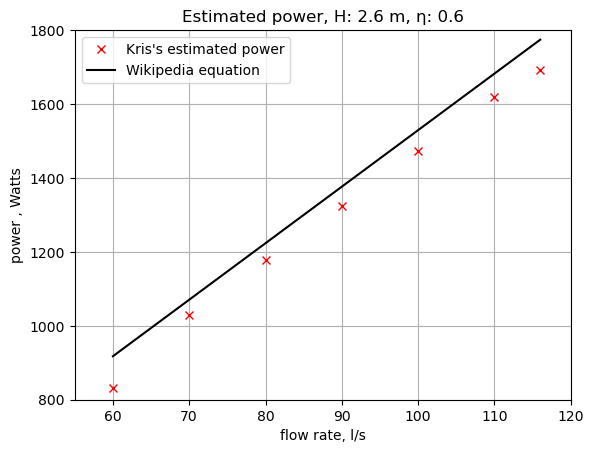

In [2]:
#| label: fig-survey-grav-pwr
#| echo: false
#| fig-cap: Kris's estimated power versus flow rate calculations

kris_est_pwr = np.array([833,1030,1177,1324,1472,1619,1692])*ureg.watts

H = 2.6*ureg.meter
eta = 0.6
Q = np.array([60,70,80,90,100,110,116])*ureg.liter/(1*ureg.sec)

plt.plot(Q.to('liter per sec').magnitude,kris_est_pwr.magnitude,'xr',label='Kris\'s estimated power')
plt.plot(Q.to('liter per sec').magnitude,(rho*g*Q*H*eta).to('watts').magnitude,'-k',label='Wikipedia equation')
plt.ylim((800,1800))
plt.xlim((55,120))
plt.grid()

plt.ylabel('power , Watts')
plt.xlabel('flow rate, l/s')
plt.legend()
plt.title('Estimated power, H: {:.1f~P}, \u03B7: {:.1f}'.format(H,eta))

plt.show()

At 60 l/s the difference is greater than for the other points. From 70 to 110 l/s, the differece is constant, with a difference of about 3.8%. At 116 l/p, the difference is about 4.6%. I'm not sure why Kris's numbers differe from the Wikipedia equation. Perhaps he was using different values for H at the various flow rates. Also, it seems courious that the final number in his table is 116 lps and not 120 lps. Additionally, I think he should be using the diameter of the wheel as the head height in his calculations.

# Case studies
The history of [water wheels](https://en.wikipedia.org/wiki/Water_wheel) dates back thousands of years and the [fundementals](https://www.british-hydro.org/waterwheels/) of water wheels are well understood. What is new is the restoration of historic water mills being employed to generate electricity. Water wheels have a low rotational speed with high torque and this equires the use of gears to step up the rotational speed to a level that can be used by electrical generators. I found two intreseting examples of small water wheels being used to generate electrical power. In each of these examples, we can calculate the overall efficiency. This is a useful data point since these water wheels are of simular size to the one Kris built.

**[Eskdale Mill](https://www.youtube.com/watch?v=NVs9EDzez0o)**  
The Eskdale Mill is profiled in the YouTube video (link above). [Smith Engineering](https://www.smith-eng.co.uk/) performed the design of the water wheel. The wheel is installed at the oldest and last working corn mill in the English Lake District, providing power for the miller’s cottage. It has been positioned adjacent to the Grade II* listed mill which has been operating for hundreds of years.

|  |  |
|---|---|
| Location | Boot, Eskdale Valley, Cumbria, England |
| Commissioned | July 2016 |
| Output | 3.5 kW |
| Flow rate | 120 l/s |
| Wheel diameter | 4.0 m |
| Wheel width | 0.8 m |
| Gearbox | Brevini epicyclic |
| Generator | Brook Crompton three-phase, 415V induction motor converted to single-phase 240V |
: Eskdale Mill, miller’s cottage water wheel summary {#tbl-Eskdale-Mill}  

In [3]:
#| echo: false
''' Water wheel system parameters
These parameters are placed here and are used throught the analysis. 
was using 'number of buckets': 16*ureg.turn, changed to 'number of buckets': 16
'''
sys_param = {
    'Head height':4.1*ureg.meter,
    'number of buckets': 16/(1*ureg.turn),  
    'wheel width': 0.8*ureg.meter,  
    'bucket volume': 48*ureg.liter,  
    'wheel diameter': 2.1*ureg.meter,  
    'bucket utilization': 0.95,  
    'gear ratio': 40,   
    'volts to RPM': 220/500}

eta_waterwheel = 0.9 # for a small waterwheel
eta_gear_box = 0.95
eta_generator = 0.9
eta_grid_tie_inverter = 0.97
eta_total = eta_waterwheel*eta_gear_box*eta_generator*eta_grid_tie_inverter
theta = 0.15 # design margin 

In [4]:
#| echo: false
H = 4*ureg.meter # diameter of the wheel, used as the head height
Q = 120*ureg.liter/(1*ureg.sec)
Markdown('The Eskdale Mill\'s water wheel has {:,.0fP}s of power available from the head. \
The output from the generator is 3.5kW, which calculates to an efficiency of {:,.1f}%. \
The diameter of the Eskdale Mill\'s water wheel is about twice the diameter of Kris\'s and generates more than twice the power. \
The flow rate at the Eskdale Mill is 120 lps, which is near the upper range of what Kris expects his flow rate to be. \
The Eskdale Mill uses an induction motor driven by a Brevini epicyclic gearbox.'.format((rho*g*Q*H).to('watts'),
((3500*ureg.W)/(rho*g*Q*H).to('watts')).magnitude*100))

The Eskdale Mill's water wheel has 4,706 watts of power available from the head. The output from the generator is 3.5kW, which calculates to an efficiency of 74.4%. The diameter of the Eskdale Mill's water wheel is about twice the diameter of Kris's and generates more than twice the power. The flow rate at the Eskdale Mill is 120 lps, which is near the upper range of what Kris expects his flow rate to be. The Eskdale Mill uses an induction motor driven by a Brevini epicyclic gearbox.

**[The Langdale Hotel and Spa, English Lake District](https://www.youtube.com/watch?v=x9VpPcSS47Q&t=2s)**     
This water wheel was also build by Smith Engineering and based on research and development that Smith Engineering had undertaken with Dr Paddy Quinlan of the University of Cumbria on bucket design and efficiency. There is a high degree fo simularity in the look of this water wheel to the one that Kris built.

|  |  |
|---|---|
| Location| Great Langdale, Cumbria, England |
| Commissioned| November 2014 |
| Output| 6 kW |
| Flow rate| 200 l/s |
| Wheel diameter| 4.1 m |
| Wheel width|  1 m |
| Gearbox|   Brevini epicyclic 177:1 ratio|
| Generator | Brook Crompton three-phase, 415V induction motor, power rating of 11kW |
: The Langdale Hotel and Spa water sheel summary {#tbl-Langdale-Hotel}

In [5]:
#| echo: false
H = 4.1*ureg.meter
Q = 200*ureg.liter/(1*ureg.sec)
Markdown('The Langdale water wheel has {:,.0fP}s'.format((rho*g*Q*H).to('watts')) + ' of power available from the head. \
The output from the generator is 6kW, which calculates to an efficiency of {:,.1f}%. '.format(((6000*ureg.W)/(rho*g*Q*H).to('watts')).magnitude*100) + \
'The diameter of the Langdale\'s water wheel is about twice the diameter of Kris\'s, but a little wider and generates more than four times the power. \
The Langdale Hotel\'s water wheel also uses an induction motor as the generator with a 177:1 Brevini epicyclic gear box. If the water wheel has a rotational \
rate of 10 RPM, then generator shaft rotation would be 1770 RPM. The generator output is less than the rated power with a de-rating of 55%.')

The Langdale water wheel has 8,039 watts of power available from the head. The output from the generator is 6kW, which calculates to an efficiency of 74.6%. The diameter of the Langdale's water wheel is about twice the diameter of Kris's, but a little wider and generates more than four times the power. The Langdale Hotel's water wheel also uses an induction motor as the generator with a 177:1 Brevini epicyclic gear box. If the water wheel has a rotational rate of 10 RPM, then generator shaft rotation would be 1770 RPM. The generator output is less than the rated power with a de-rating of 55%.

Links to other water wheel videos:

- [Hydro electric water wheel with generator in Egloffstein](https://www.youtube.com/watch?v=wAV4d6WHo70): A hydro-electric water wheel in Egloffstein Franconia with 12kW Generator.  
- [Stunning Franconia Aerial #6 Hydro electric water wheel in Egloffstein](https://www.youtube.com/watch?v=7l9t_t8ES-Q); The camera is flying over a hydro-electric water wheel in Egloffstein, Franconia (Germany).    
- [Two views of the 1926 Fitz overshot waterwheel at Hanford Mills Museum](https://www.youtube.com/watch?v=KufodXxwCfg): Two views of the 1926 Fitz Overshot waterwheel in operation at Hanford Mills Museum in East Meredith, NY. The power generated is used to run the sawmill and woodworking machines. The first view is from the visitor platform, and the second is from the tail race. The 10-foot diameter waterwheel is 12 feet wide. A system of belts, pulleys and gears transfers the power to machines upstairs in the Mill.  
- [Waterwheel power 4kW to grid](https://www.youtube.com/watch?v=R4f_xgx7yQ0): We re-purposed this 140 year old wheel to generate and export power back to the grid in 2007/8. 10 years on and its made well over 100,000kWh energy, most of it exported ..  generation matches flow availability, we could process more but the axles at its limit and the wheel floods .. efficiency is very high, the gearbox and generator silent, its a capacitor excited induction generator with integral flow management and grid tie cabinet. The system hinges around the ponds water level, the original wheel control sluice is reused. This is a beautifully engineered large wheel running well within its capabilities, the iron structure is much more than functional, a look in detail shows considerable artisan and design skills ... we believe this is the largest wheel on a domestic property in UK Update 2019/20:  still working really, really well. New owner,  Francis, has addressed a number of site issues and runs at full rated power most of the time.  we're well on the way to the first 500,000 kWh energy production.  
- [Water wheel - Energy Power Generator - Construction KIT](https://www.youtube.com/watch?v=p53yPXfZLE8): Water wheel - Upper bucket - Building kit. We offer a complete building kit or just drawings for the CNC production of a water wheel type - Upper bucket. The material for production is stainless steel or ordinary steel. It is possible to change the dimensions as required. The water wheel is a suitable water engine for all historic buildings, such as a power plant or as decoration. At reduced speeds, it can process many times smaller flows than expected, without a decrease in efficiency.   

Key takeaways:  
  
- In most cases, the water velocity in the flume is lower than in Kris's flume and there is not a lot of splashing as the buckets are bing filled.  
- The rated power of the generator is useally higher than the avaliable power. I think the size of the generator needs to have some de-rating applied. If the water wheel Kris was building was capable of producing 1500 Watts, the generator should be rated for someting like 2000 Watts of continious operation. 
- The size of these systems are more than twice the size of the system Kris is building, perhaps indicating the economics is more favarable for a larger water wheel. 

# Hydro system analysis

In [6]:
#| echo: false
Markdown('The analysis will consist of looking at the performance of the water wheel based on the information avaliable from Kris\'s YouTube videos. \
In the calculations that follow, the water wheel diameter is {:.1f#P}s with a width of {:.0f#P}s. \
The number of buckets on the wheel is {:.0f} and the bucket volumne is {:.0f#P}s. In the first iteration of the design Kris had a gear \
ratio of 1:20 and later he increased the ratio to 1:40. The generator that Kris used initially was a perminate magnet \
generator rated for 2,000 Watts at 500 RPM.'.format(sys_param['wheel diameter'],sys_param['wheel width'],sys_param['number of buckets'],sys_param['bucket volume']))

The analysis will consist of looking at the performance of the water wheel based on the information avaliable from Kris's YouTube videos. In the calculations that follow, the water wheel diameter is 2.1 meters with a width of 800 millimeters. The number of buckets on the wheel is 16 / turn and the bucket volumne is 48 liters. In the first iteration of the design Kris had a gear ratio of 1:20 and later he increased the ratio to 1:40. The generator that Kris used initially was a perminate magnet generator rated for 2,000 Watts at 500 RPM.

The control of the water into the leat which feeds the mill pond appears to be unregulated and roughly controlled by a rock wier and wooden planks. The flow of water in the flume and spillway is set by stacking boards boards to damn the water to the desired level. With this manually set arrangement, there is no flow control and the hydo system runs open loop; other than the over speed shutoff. The maximum flow in the flume is set by the spill way height. This means that the load on the waterwheel and rotational rate is determined the the inverter.

Kris use an overall efficieny of 60% in his calculations. I've decided to break out the efficiencies of the major components and then calculate an overall efficiency.

## Efficiencies
A typical overshot [Water wheel](https://en.wikipedia.org/wiki/Water_wheel) has the water channeled to the wheel at the top and slightly beyond the axle. The water collects in the buckets on that side of the wheel, making it heavier than the other "empty" side. The weight turns the wheel and the water flows out into the tail-water when the wheel rotates enough to invert the buckets. The overshot design can achieve 90% efficiency. Nearly all of the energy is gained from the weight of water lowered to the tailrace although a small contribution may be made by the kinetic energy of the water entering the wheel.

The efficiencies I'll be using in my calculations: 

- $\eta$ for waterwheel = 90%  
- $\eta$ for gear box =  95%  
- $\eta$ for generator = 90%
- $\eta$ for grid-tie inverter = 97%   

In [7]:
#| echo: false
Markdown('These effencienies have been adjusted to give an overall efficiency in line with what has been acheived in the case studies. \
The total system efficiency used in the analysis is {:.1f}%'.format(eta_total*100))

These effencienies have been adjusted to give an overall efficiency in line with what has been acheived in the case studies. The total system efficiency used in the analysis is 74.6%

## Design parameters
In the YouTube video and the project survey, Kris stated that the veritcal height that was available down stream from the dam would allow for a 2.1 meter diameter water wheel with some room clearace above and below. The flume would need to be about 8 meters long. The flow rate avalailbe ranged from 60 to 120 liters per second (lps or l/s) and that the goal was to generate 1,500 Watts, presummably at 120 lps. Most of the technical parameters have been summarized in @tbl-tech-parm. The important paramters for the analysis of the hydro system are the wheel diameter and the water flow rate.

The water source for the project is a river that runs adjacent to the property from which a leat diverts a small portion of water to the mill pond. The leat, mill pond as mentioned in the videos were constructed some time ago and the dam had been removed. The range of flow rates from the leat and out of the mill pond was estimated to be in the range of 60 to 116 lps. Kris was hoping to produce 1500 Watts from about 110 lps.

In the calculations that follow, I'm using a range of flow rates from 60 to 120 lps and a total efficiency of 75% as discussed above. I've decided to include a design margin of $\theta$ = 15% in the power estimate calculation to account for unknowns and/or poor estimates.

The gravitation power of water at various flow rates is plotted in @fig-grav-pwr. As discussed avove, the head height is 2.1 meters since this is the distance water moves as it is carried by the water wheel's buckets from the 12 o'clock position to the botton at the 6 o'clock position. The shaded area is the expected nornal variation in flow rate, 60 lps to 120 lps. 

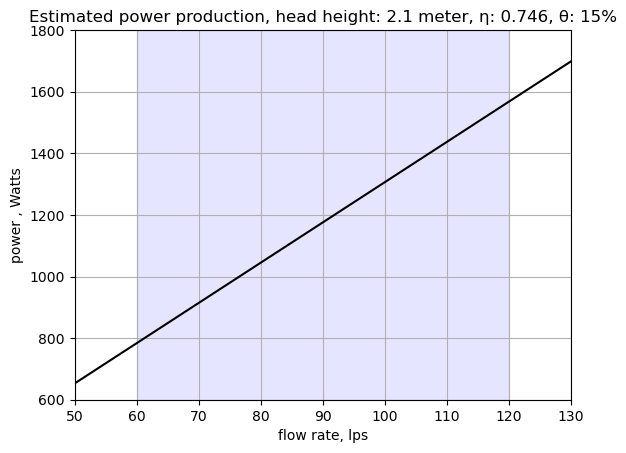

In [8]:
#| label: fig-grav-pwr
#| echo: false
#| fig-cap: Estimated power production for a head of 2.1 m at various flow rates

theta = 0.15 # design margin 
step_size = 20
Q = np.arange(40, 180+step_size, step_size)*ureg.liter/(1*ureg.sec)

plt.plot(Q.to('liter per sec').magnitude,(rho*g*Q*sys_param['wheel diameter']*eta_total*(1-theta)).to('watts').magnitude,'-k')

# hightlight the operating flow rates, 60 to 120 lps
plt.axvspan(60, 120, color='b', alpha=0.1)
plt.xlim((50,130))
plt.ylim((600,1800))
plt.grid()

plt.ylabel('power , Watts')
plt.xlabel('flow rate, lps')

plt.title('Estimated power production, head height: {:.1fP}, \u03B7: {:.3f}, \u03b8: {:.0f}%'.format(sys_param['wheel diameter'],eta_total,theta*100))

plt.show()

The estimated power production ranges from just below 800 Watts at 60 lps to just almost 1600 Watts at 120 lps. The ability of the hydro system to produce electrical power at these levels is dependednt on a properly designed system operating at the efficiencies discussed above. The included design margin of 15% provides some wiggle room. In @tbl-kris-pwr, Kris thought 1500 Watts could be produced with a flow rate between 100 and 110 lps. However, @fig-grav-pwr, shows that a flow rate of about 115 lps is needed to make 1500 Watts.  

In [9]:
#| echo: false
Markdown('With a flow rate range of {:.0f~P} to {:.0f~P}, the estimated power avaliable is {:.1f~P} to {:.1f~P}, \
so it appears that making 1300 W at 110 lps and 1500 W at 120 lps is feasable.'.format(Q[0],
    Q[-1],(rho*g*Q[0]*sys_param['wheel diameter']*eta_total*(1-theta)).to('watts'),
    (rho*g*Q[-1]*sys_param['wheel diameter']*eta_total*(1-theta)).to('watts')))

With a flow rate range of 40 l/s to 180 l/s, the estimated power avaliable is 522.5 W to 2351.3 W, so it appears that making 1300 W at 110 lps and 1500 W at 120 lps is feasable.

## Instrumentation
Kris utilized only a volt meter and relied on the inverter to provide him an indication of the power being generated. For testing, he should have used a resistive load, a volt meter (which he did use) and an amp meter. He could have used the dump load across the three phase recitfier. This would have eliminated any setup issues with the inverter. 

Other instrumentation which would have been helpful to have for testing and set up of the system:

- water wheel rotation rate
- generator frequency
- mill pond surface level
- web cam on water wheel, mill pond etc. for remote monitoring
- inverter status

### Inverter
In the videos, Kris uses a [Solis S6 Series](https://www.solisinverters.com/uploads/file/Solis_Manual_S6-GR1P(2,5-6)K_FN_EUR_V1.2(20221116).pdf) single phase [inverter](https://en.wikipedia.org/wiki/Power_inverter) to convert the DC voltage from the rectifier block to AC. He was not clear how the inverter was connected or what the load was during testing. @tbl-solis-inv provides a summary of the specifications for the 2.5kW inverter. 

| | |
|---|---|
| Model | S6-GR1P2.5K |
| Max. DC input voltage (Volts) | 550 |
| Rated DC voltage (Volts) | 250 |
| Startup voltage (Volts) | 60 |
| MPPT voltage range (Volts) | 50 to 450 |
| Max. input current (Amps) | 14+14 |
| Rated output power (Watts) | 2500 |
| Rated grid voltage (Volts) | 1/N/PE, 220/230 |
| Rated output current (Amps) | 11.4/10.9 |
| Max. output current (Amps) | 13.3 |
| Power Factor (at rated output power) | > 0.99 (0.8 leading - 0.8 lagging) |
| THDi (at rated output power) | <3% |
| Rated grid frequency (Hertz) | 50/60 |
| Operating frequency range (Hertz) | 45 to 55 or 55 to 65 |
| Max.efficiency | 97.3% |
| EU efficiency | 96.5% |
: Specifications for Solis 2.5kW S6 Series {#tbl-solis-inv}

Kris was able to control the speed of the wheel by changing the mode to constant voltage mode and setting the value to 100 volts. This casued the generator to get smoking hot under full flow conditions. About this time he started to suspect that the rating of the generator was much less than indicated on the face plate of the generator. But the situation is a little confusing. I suspect that the availavle power was much greater than the power indicated on the inverter display, so the difference was being dissipated as heat in the generator, since the generator was being forced to provide a breaking load to the water wheel. This is why using a fixed power resistor as the load would have been much better for inital testing. 

There are a couple things to keep in mind.  

- The maximum DC input voltage is 550 Volts, so some determination would need to be made if a free spinning water wheel could under any conditions, normal or abnoramal, cause the generator to produce a voltage in excess of this limit. If there is a chance, then some sort of over voltage protection is needed. Earily in the video series, Kris did check the open circuit voltage out of the rectifier and a high flow rate an measured 350 Volts, but this was hardly a comprhensive analysis of the maximum possible voltage. 
- The operating mode of the Solis S6 Series needs to be investigated, because it's not clear to me that a MMP mode is optimum for a small hydro system running open loop. 

### Electrical load for analysis and testing
In the videos, Kris was using inverter as the electrical load for the generator. I think he should have been using a high power resistive load for his inital tests. Three portable electric heaters or his dump load could have been used for testing. Once everything was sorted out, he could then connect to the Solis S6 Series inverter for additional tests.

To calculate the load resistance for my analysis, I'm assuming that 1500 Watts is the load he should be using; I'm assuming the geneator makes 220 volts line to line, at the rated power, at 500 RPM. 

The generator is connected to rectifier block. Kris didn't say too much about the rectifier, so I'll assume that it is a three phase full wave rectifier with six diodes being used to convert the three phase alternating current to direct current.

The voltage across the positive and negative terminals of the recitfier block is calculated from the generator output line to line voltage by the following: 

$V_{load(DC)} = \frac{3\sqrt{2}}{\pi} V_{generator L-L(RMS)}$

This equation is described in the Wikipedia article, [Three-phase bridge rectifier uncontrolled](https://en.wikipedia.org/wiki/Rectifier). The Wikipedia derivation uses line to netural, whereas I'm using line to line, so that's why my equation is a written differently than in the article.

In [10]:
#| echo: false
R_load = (220*ureg.volt*3*np.sqrt(2)/np.pi)**2/(1500*ureg.watt)
R_load.ito('ohm')
Markdown('Rearranging the relation: $P=V^2/R$, we can calculate the value of the resistor needed to dissapate 1500 Watts \
at voltage developed by 500 RPM on the generator shaft. A load resistance of {:.1f~P} will provide the required load'.format(R_load))

Rearranging the relation: $P=V^2/R$, we can calculate the value of the resistor needed to dissapate 1500 Watts at voltage developed by 500 RPM on the generator shaft. A load resistance of 58.8 Ω will provide the required load

## Gear box
A gear box is required to convert the relatively low rotational speed of the water wheel to a higher rotational speed required for the generator. Kris is using a combination of a reduction box driven from the low end to step up the RPM by 20. Later he added a larger pulley to provide an addition step up in RPM of 2; this is a total RPM step up of 40.  

## Generator and rectifier voltage
I'm going to assum that the generator's output voltage is linear with respect to the generator shaft rotational speed (at least over the expected operating RPM range, some where near the water wheel rotational speed of 10 RPM). In the videos, Kris used several generators and he usually measured the generator voltage at the output recifier. The first generator appears to have a rated voltage of 220 Volts line to line. Later this generator was swapped out for one with a lower voltage rating of 96 Volts. In the final video, Kris changes the generator to a self excied induction generator.

From my recolection, Kris allways measures the voltage at the recitfier's DC terminals. 

In the first video Kris measured 230 Volts out of the recitfier when he was spining the wheel in his shop at what estimated was the proper speed. I'm wondering if he was spinning to get 230 volts and calling that the proper speed? In the second video he measured 240 volts when the wheel was free spinning. 

- Kris didn't explain why he changed from 220 to 96 volts except to say he was concerned that the wheel was spinning too fast. 
- The initial design had the 220 Volt generator, so that's what I'm going with for the initial part of the analysis, later I'll address the generator questions.

The plot below shows the line to line generator voltage vs water wheel RPM, assuming a gear box of 40:1. The genertor needs 500 shaft RPM to make 220 volts at the rated power. One of the issues with Kris's design is the gear ratio is too low. I think the ratio needs to be more like 1:60 to keep the water wheel RPM in the optimal range. 

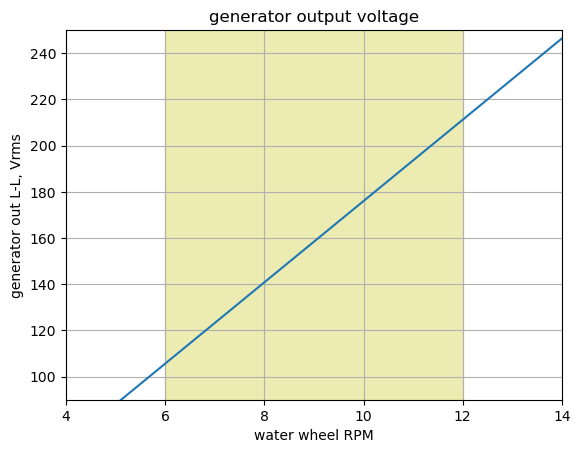

In [11]:
#| label: fig-rpm2volts
#| echo: false
#| fig-cap: "generator output voltage vs water wheel RPM"

water_wheel_rotation_frequency = (np.arange(5,21))*ureg.rpm
#gear_box = 40
#gen_volt2rpm = 220/500
gen_voltage = (sys_param['volts to RPM']*water_wheel_rotation_frequency.magnitude*sys_param['gear ratio'])*ureg.volt

plt.plot(water_wheel_rotation_frequency.magnitude,gen_voltage.to('volt').magnitude, '-')

# hightlight the operating band, 8 to 14 RPM
plt.axvspan(6, 12, color='y', alpha=0.3)

plt.xlim((4,14))
plt.ylim((90,250))
plt.grid()

plt.ylabel('generator out L-L, Vrms')
plt.xlabel('water wheel RPM')

plt.title('generator output voltage')
plt.show()

A water wheel rotational speed of 6 to 12 RPM is expected to be the optium range of the wheel rotation, which is highlighted in the plot above. The optimum range is based on the expected seasonal flow rates ranging from 60 lps to 120 lps and the tangential velocity of the wheel matching the water velocity in the flume. As describe above, the hydro system's flow rate is not regulated, so there will be a range of flows that the water wheel is expected to encounter.  

As shown in @fig-rpm2volts, the line to line output of the generator is a function of the water wheel rotational speed. For this analysis we are assuming that the relationship is linear over this range. For a permanent magnet generator, this is usally the case, and typically a generator's performance curve will show a high degree of linearity over the middile part of the RPM range. Later in the project Kris changed generators, as described below, to an induction generator running in a self excited configuration. An induction generator, while being a valid and reasonable option, requires a different set of assumtpings for the analysis, since self excited induction generators have poor voltage regulation. Which means that after the induction generator's voltage climes to a voltage near the operating voltage during startup and the 'system' applies a load, the voltage will drop by a significant amount.     

Later, I'll look at power flow through the hydo system. Power from gravity on the mass of the water, to the rotational power of the wheel (RPM x torque), to the genrator and finally to the electrical test load. Accounting for losses along the way, the power delivered to the electrical load should be equal to the rotational power of the wheel minus the losses. 

## Water wheel
The water wheel the Kris designed and fabricated has a diameter of 2.1 meters, 16 buckets, each with a capacity of 48 liters and the wheel width is 0.8 meters. In the calculations that follow, I'm assuming the wheel will have a rotational frequency of between 5 to 15 rotations per minute (rpm). The electrical load on the generator will limit the rotational frequency of the water wheel by resisting the torque delivered to the generator shaft. The electrical load is provided by the inverter. Through out the calculations that follow, I'm assuming that the wheel rotation frequency will be limited by the electrical load placed on the generator by the inverter. If the wheel is making 1000 Watts and delivering this power to the generator shaft, it is assumed that the generator will extract the power at an RPM within the range of 5 to 15 RPM based on the power delivered to the electrical load. 

There are 16 buckets, each with a capacity of 48 liters. I'll assum that the buckets will fill to a level of 95% of the bucket volumn. However, Kris stated in his video, that he though the bucket capacity was more like 50 liters because of the side wall of the wheel frame. In all the water wheels that I have observed on various YouTube videos, the buckets don't fill to 100%. I'll assume that the buckets are being filled to 95% of capacity.

### Water carring capacity vs rpm
For a give rpm and fill level, the water wheel can move a fixed amount of water. The water carring capacity is calculated by taking the rotation frequency times the number if buckets times the bucket capacity utilization. The Python pint library keeps track of the units. The number of buckets has the dimention of 16 per circle, so the product of the terms has dimentions that can be converted to liters per second.

The water wheel carring capacity at various flow rates is plotted below.

:::{.callout-note}  
I'm not sugesting that the water wheel can actually carry the volumn of water at RPM's above 12 or so. The efficient filling of buckets probably requires that the tangential velocity of the water wheel approximately matches the water velocity at the flume exit.
:::

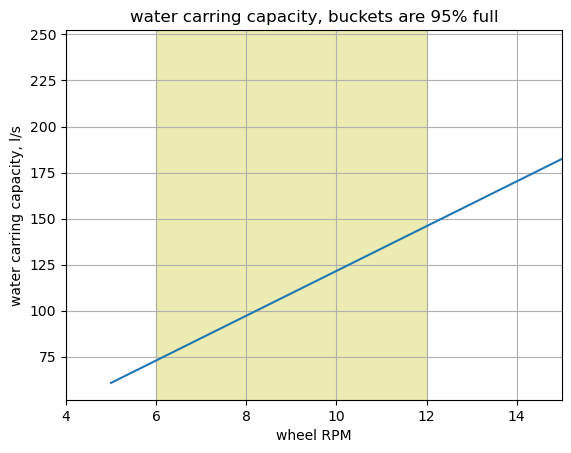

In [12]:
#| label: fig-rpm2lps
#| echo: true
#| fig-cap: water carring capacity vs water wheel RPM

plt.plot(water_wheel_rotation_frequency.magnitude,
    (water_wheel_rotation_frequency*sys_param['number of buckets']*sys_param['bucket volume']*sys_param['bucket utilization']).to('liter/sec').magnitude, '-')

# hightlight the operating band, 8 to 14 RPM
plt.axvspan(6, 12, color='y', alpha=0.3)

plt.xlim((4,15))
#plt.ylim((40,200))
plt.grid()

plt.ylabel('water carring capacity, l/s')
plt.xlabel('wheel RPM')

plt.title('water carring capacity, buckets are {:.0f}% full'.format(sys_param['bucket utilization']*100))
plt.show()

In [13]:
#| echo: false
table_header = ['wheel rpm', 'water carring capacity, lps']
table_row = []
for i in water_wheel_rotation_frequency:
    table_row.append([i.to('rpm').magnitude,(i*sys_param['number of buckets']*sys_param['bucket volume']*sys_param['bucket utilization']).to('liter/sec').magnitude])

print(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple",floatfmt=('.0f',',.1f')))

wheel rpm    water carring capacity, lps
-----------  -----------------------------
5            60.8
6            73.0
7            85.1
8            97.3
9            109.4
10           121.6
11           133.8
12           145.9
13           158.1
14           170.2
15           182.4
16           194.6
17           206.7
18           218.9
19           231.0
20           243.2


At 10 RPM, the wheel can move at most 121 lps. At higher flow rates, the excess water will overflow the buckets and not contribute any additional weight to the bucket and consequently torque to the wheel. I did notice that the water velocity in the flume was too high and buckets were not filling efficiently except at very low flow rates.

## Power equilibrium
The calculations that follow will estimate the equilibrium point between the power produced by the water wheel and the power consumed by the electrical load. The assumption is that the buckets are being filled efficiently. However, we know that if the water velocity is too high the buckets will not fully fill since a lot of the water will splash out of the buckets. The water velocity entering the buckets needs to be about the same as the tangential wheel velocity.   

### Water wheel torque vs rpm
The force that turns the wheel is provided by gravity and the mass of the water. Only about half of the buchets on one side of the wheel are filled with water and the weight imbalance causes the wheel to turn under the force of gravity. The turning force us called [torque](https://en.wikipedia.org/wiki/Torque) and is a measure of the force that produces a rotation. To calculate the torque, we use the horizontal distance of each bucket with water from the axis of the wheel multiplied by the force of gravity acting on the mass of the water. The units of torque are [Newton](https://en.wikipedia.org/wiki/Newton_(unit)) meters.  

The moment arm for each bucket on one side of the wheel is calculated by taking the sin of angle for each buckets position and mutiplying by the radius of the wheel. We want to do a series of calculations for a set of flow rates and water wheel rotational speeds. Each bucket can only carry 47 liters, so if the flow rate is too high for the rotational speed, the butckets will over flow and only the weight of the actual water in the bucket is counted. 

The calculations below assume that the water is filling the buckets in an efficicent manner and the momentum of the water is not included in the torque calculatons. If the water did have a lot of momentum, it would splash out of the buckets rather than filling them, which is what we see in the videos. 

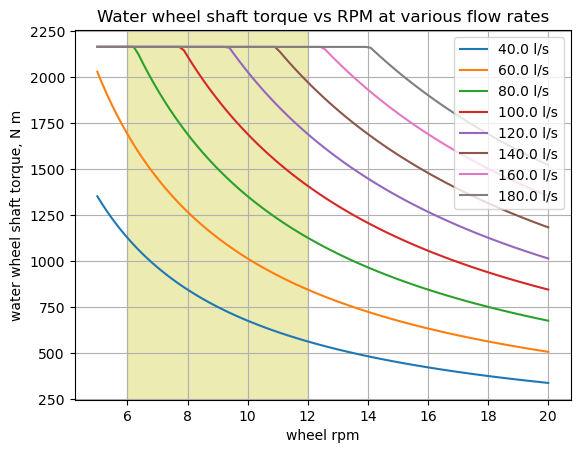

In [14]:
#| label: fig-rpm2torque
#| echo: true
#| fig-cap: Water wheel shaft torque vs RPM at various flow rates

# calculate the horizontal distance for each bucket on one side
x = np.linspace(0, np.pi,int(sys_param['number of buckets'].magnitude/2))
moment_arm = (sys_param['wheel diameter']/2)*np.sin(x)

# do the calculations from 5 to 20 rpm using 100 points
water_wheel_rotation_frequency = (np.linspace(5,20,100))*ureg.rpm

for i in range(len(Q)):  # use the same flow rate range from above
    water_wheel_shaft_torque = np.zeros(len(water_wheel_rotation_frequency))*ureg.kilogram*ureg.g0*ureg.meter # creat an empty array with the proper units attached

    for j in range(len(water_wheel_rotation_frequency)):
        # given the rotational rate, how much water can be moved, if the buckets were full?
        water_transport_rate = (sys_param['number of buckets']*sys_param['bucket volume']*water_wheel_rotation_frequency[j]).to('liter/sec')

        bucket_utilization = Q[i]/water_transport_rate # estimate of how full the buckets are
        
        # limit transport rate to flow rate
        if bucket_utilization > 1:
            bucket_utilization = 1
            water_transport_rate = Q[i]

        weight_of_water_per_bucket = (rho*sys_param['bucket volume'])*bucket_utilization

        torque_per_bucket = (weight_of_water_per_bucket*ureg.g0*moment_arm).to_base_units()
        water_wheel_shaft_torque[j] = torque_per_bucket.sum()    
     
    plt.plot(water_wheel_rotation_frequency.magnitude,water_wheel_shaft_torque.to('N m').magnitude,'-',label='{:.1f~P}'.format(Q[i]))

plt.grid()

# hightlight the operating band, 8 to 14 RPM
plt.axvspan(6, 12, color='y', alpha=0.3)

plt.ylabel('water wheel shaft torque, N m')
plt.xlabel('wheel rpm')

plt.title('Water wheel shaft torque vs RPM at various flow rates')
plt.legend(loc=1)

plt.show()

The plot above shows the water wheel shaft torque over a range of wheel RPM and flow rates. At the lowest flow rate plotted, 40 lps, the buckets do not completely fill at any of the wheel RPMs plotted. The 60 lps torque curve decreases with increasing RPM because at higher rotational speeds, there is less water in each bucket, which contributes less force to the moment arm. At the next flow rate plotted, 80 lps, you can see that at a wheel RPM of just under 6, the buckets are completely full and the torque is constant at about 2164 Nm. At the highest flow rate plotted, 180 lps, if the wheel is spinning faster than 14 RPM, the buckets are only partially filled with water and the torque decreases with wheel RPM. This analysis assumes that the buckets can efficiently fill with water over the range of rotational speeds; but above 12 RPM this is doubtful since there will likely be a mismatch between the water velocity in the flume and the tangential velocity of the wheel.

### Water wheel shaft power vs rpm
Having calculated the water wheel shaft torque over a range of wheel RPMs and flow rates, we can use the same method to calculate the water wheel shaft power, which is the product of torque, rotational speed and water wheel efficiency.

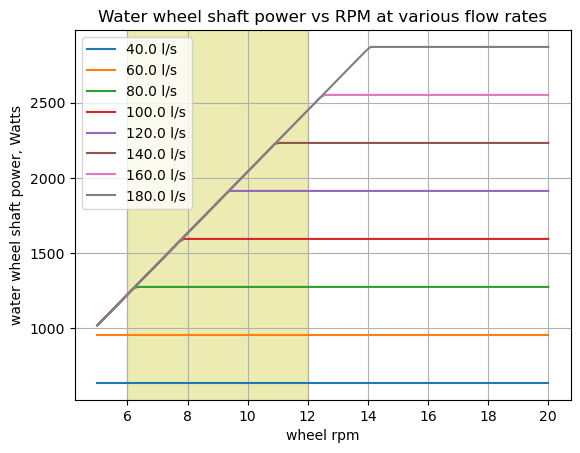

In [15]:
#| label: fig-rpm2pwr
#| echo: true
#| fig-cap: Water wheel shaft power vs RPM at various flow rates

for i in range(len(Q)):
    water_wheel_shaft_torque = np.zeros(len(water_wheel_rotation_frequency))*ureg.kilogram*ureg.g0*ureg.meter

    for j in range(len(water_wheel_rotation_frequency)):
        water_transport_rate = (sys_param['number of buckets']*sys_param['bucket volume']*water_wheel_rotation_frequency[j]).to('liter/sec')

        bucket_utilization = Q[i]/water_transport_rate

        # limit transport rate to flow rate
        if bucket_utilization > 1:
            bucket_utilization = 1
            water_transport_rate = Q[i]

        weight_of_water_per_bucket = (rho*sys_param['bucket volume'])*bucket_utilization

        torque_per_bucket = (weight_of_water_per_bucket*ureg.g0*moment_arm).to_base_units()
        water_wheel_shaft_torque[j] = torque_per_bucket.sum()    

    plt.plot(water_wheel_rotation_frequency.magnitude,(water_wheel_shaft_torque*water_wheel_rotation_frequency*eta_waterwheel).to('watts').magnitude,'-',label='{:.1f~P}'.format(Q[i]))

plt.grid()

# hightlight the operating band, 8 to 14 RPM
plt.axvspan(6, 12, color='y', alpha=0.3)

plt.ylabel('water wheel shaft power, Watts')
plt.xlabel('wheel rpm')

plt.title('Water wheel shaft power vs RPM at various flow rates')
plt.legend(loc=0)

plt.show()

The plot above shows that the water wheel shaft power is constant for a flow rate of 60 lps. A faster spinning wheel will have less torque since the buckets are less full and less weight in the buckets produces less torque, but since power is the product of torque and rotational speed, the result is constant over the range of RPMs. At the highest flow rate of 180 lps, the shaft power increases with wheel RPM since up to about 14 RPM where the buckets are completely full.

The shape of the power curve versus wheel RPM indicates that a Maximum Power Point Tracking (MPPT) algorithm will hunt for a peak in the curve, probably by letting the RPM increase, where at some point the buckets will not fill efficiently and there will be a decrease in torque. This would suggest that MPPT is not ideal.

**Power equilibrium at 100 lps**  
The calculations below, tabulate the water wheel shaft torque and water wheel shaft power at a flow rate of 100 lps over a range of RPMs. The water wheel shaft power is labeled here as available power. Available power is the power the water wheel could deliver if it was allowed to rotate at the particular RPM indicated in each row of the table. For each water wheel RPM, the generator line to line voltage is calculated using a straight line approximation based on the ratio of 220 volts to 500 RPM and the DC voltage, current and electrical power on the load is calculated. 

In [16]:
#| label: tbl-pwr-equil
#| echo: true
#| tbl-cap: Power equilibrium

water_wheel_rotation_frequency = (np.arange(5,21))*ureg.rpm

i = 3 # index of 3 is 120 lps

table_header = ['flow','rpm','torque','avaliable pwr','load volts','load amps','load pwr']
table_row = []

water_wheel_shaft_torque = np.zeros(len(water_wheel_rotation_frequency))*ureg.kilogram*ureg.g0*ureg.meter

for j in range(len(water_wheel_rotation_frequency)):
    water_transport_rate = (sys_param['number of buckets']*sys_param['bucket volume']*water_wheel_rotation_frequency[j]).to('liter/sec')

    bucket_utilization = Q[i]/water_transport_rate

    # limit transport rate to flow rate
    if bucket_utilization > 1:
        bucket_utilization = 1
        water_transport_rate = Q[i]

    weight_of_water_per_bucket = (rho*sys_param['bucket volume'])*bucket_utilization

    torque_per_bucket = (weight_of_water_per_bucket*ureg.g0*moment_arm).to_base_units()
    water_wheel_shaft_torque[j] = torque_per_bucket.sum()    

    # calculate the avaliable power produced by the water wheel
    available_pwr = (water_wheel_shaft_torque[j]*water_wheel_rotation_frequency[j]*eta_waterwheel)

    # calculate the generator output voltage at each rotational speed
    V_line_line_rms = sys_param['volts to RPM']*water_wheel_rotation_frequency[j].magnitude*sys_param['gear ratio']*ureg.volt
    
    #Vp_rms = V_line_line_rms/np.sqrt(3)
    #Vp_peak = Vp_rms*np.sqrt(2)
    #V_load = (3*np.sqrt(6)/np.pi)*Vp_rms
    V_load = V_line_line_rms*3*np.sqrt(2)/np.pi
   
    load_current = V_load/R_load
    load_pwr = (R_load*load_current**2)*eta_gear_box*eta_generator    
    
    #load_volts = (220/500)*water_wheel_rotation_frequency[j].magnitude*gear_box*ureg.volt
    #load_current = load_volts/R_load
    #load_pwr = R_load*load_current**2
    
    table_row.append(
            [Q[i].magnitude,
            water_wheel_rotation_frequency[j].magnitude,
            water_wheel_shaft_torque[j].to('N m').magnitude,
            available_pwr.to('watts').magnitude,
            V_load.magnitude,
            load_current.magnitude,
            load_pwr.magnitude])                                                                   
    
Markdown(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal','decimal','decimal','decimal','decimal'),tablefmt="simple",floatfmt=('.0f','.0f',',.1f',',.1f','.1f','.1f',',.1f')))

flow      rpm    torque    avaliable pwr    load volts    load amps    load pwr
------  -----  --------  ---------------  ------------  -----------  ----------
100         5   2,164.9          1,020.2         118.8          2.0       205.2
100         6   2,164.9          1,224.2         142.6          2.4       295.5
100         7   2,164.9          1,428.3         166.4          2.8       402.2
100         8   2,114.2          1,594.1         190.1          3.2       525.3
100         9   1,879.3          1,594.1         213.9          3.6       664.8
100        10   1,691.4          1,594.1         237.7          4.0       820.8
100        11   1,537.6          1,594.1         261.5          4.4       993.2
100        12   1,409.5          1,594.1         285.2          4.8     1,182.0
100        13   1,301.0          1,594.1         309.0          5.3     1,387.2
100        14   1,208.1          1,594.1         332.8          5.7     1,608.8
100        15   1,127.6          1,594.1         356.5          6.1     1,846.8
100        16   1,057.1          1,594.1         380.3          6.5     2,101.2
100        17     994.9          1,594.1         404.1          6.9     2,372.1
100        18     939.6          1,594.1         427.8          7.3     2,659.4
100        19     890.2          1,594.1         451.6          7.7     2,963.1
100        20     845.7          1,594.1         475.4          8.1     3,283.2

In [17]:
print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal','decimal','decimal','decimal','decimal'),tablefmt="simple",floatfmt=('.0f','.0f',',.1f',',.1f','.1f','.1f',',.1f')))

flow      rpm    torque    avaliable pwr    load volts    load amps    load pwr
------  -----  --------  ---------------  ------------  -----------  ----------
100         5   2,164.9          1,020.2         118.8          2.0       205.2
100         6   2,164.9          1,224.2         142.6          2.4       295.5
100         7   2,164.9          1,428.3         166.4          2.8       402.2
100         8   2,114.2          1,594.1         190.1          3.2       525.3
100         9   1,879.3          1,594.1         213.9          3.6       664.8
100        10   1,691.4          1,594.1         237.7          4.0       820.8
100        11   1,537.6          1,594.1         261.5          4.4       993.2
100        12   1,409.5          1,594.1         285.2          4.8     1,182.0
100        13   1,301.0          1,594.1         309.0          5.3     1,387.2
100        14   1,208.1          1,594.1         332.8          5.7     1,608.8
100        15   1,127.6          1,594.1

The available power and the load power will reach equilibrium at around 14 RPM. The point of intercestion is plotted below.

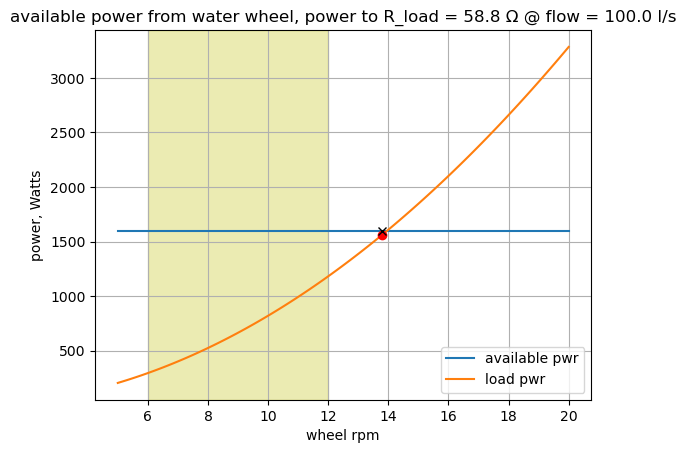

In [18]:
#| label: fig-pwr-equil
#| echo: true
#| fig-cap: Power equilibrium

water_wheel_rotation_frequency = (np.linspace(5,20,100))*ureg.rpm

# initialize some empty arrays
water_wheel_shaft_torque = np.zeros(len(water_wheel_rotation_frequency))*ureg.kilogram*ureg.g0*ureg.meter
available_pwr = np.zeros(len(water_wheel_rotation_frequency))*ureg.watt
load_pwr = np.zeros(len(water_wheel_rotation_frequency))*ureg.watt

for j in range(len(water_wheel_rotation_frequency)):
    water_transport_rate = (sys_param['number of buckets']*sys_param['bucket volume']*water_wheel_rotation_frequency[j]).to('liter/sec')

    bucket_utilization = Q[i]/water_transport_rate

    # limit transport rate to flow rate
    if bucket_utilization > 1:
        bucket_capacity_utilization = 1
        water_transport_rate = Q[i]

    weight_of_water_per_bucket = (rho*sys_param['bucket volume'])*bucket_utilization

    torque_per_bucket = (weight_of_water_per_bucket*ureg.g0*moment_arm).to_base_units()
    water_wheel_shaft_torque[j] = torque_per_bucket.sum()    

    # calculate the generator out put voltage at each rotational speed
    available_pwr[j] = (water_wheel_shaft_torque[j]*water_wheel_rotation_frequency[j]*eta_waterwheel)
    V_line_line_rms = sys_param['volts to RPM']*water_wheel_rotation_frequency[j].magnitude*sys_param['gear ratio']*ureg.volt
    
    #Vp_rms = V_line_line_rms/np.sqrt(3)
    #Vp_peak = Vp_rms*np.sqrt(2)
    #V_load = (3*np.sqrt(6)/np.pi)*Vp_rms
    V_load = V_line_line_rms*3*np.sqrt(2)/np.pi
   
    load_current = V_load/R_load
    load_pwr[j] = (R_load*load_current**2)*eta_gear_box*eta_generator  
    
plt.plot(water_wheel_rotation_frequency.magnitude, available_pwr.to('watts').magnitude,'-',label='available pwr')
plt.plot(water_wheel_rotation_frequency.magnitude, load_pwr.to('watts').magnitude,'-',label='load pwr')  

idx = np.argwhere(np.diff(np.sign(load_pwr.to('watts').magnitude - available_pwr.to('watts').magnitude))).flatten()
plt.plot(water_wheel_rotation_frequency.magnitude[idx], load_pwr.to('watts').magnitude[idx], 'ro')
plt.plot(water_wheel_rotation_frequency.magnitude[idx], available_pwr.to('watts').magnitude[idx], 'kx')

# hightlight the operating band, 6 to 12 RPM
plt.axvspan(6, 12, color='y', alpha=0.3)

plt.grid()

plt.ylabel('power, Watts')
plt.xlabel('wheel rpm')

plt.title('available power from water wheel, power to R_load = {:.1f~P} @ flow = {:.1f~P}'.format(R_load,Q[i]))
plt.legend(loc=0)

plt.show()

In [19]:
water_wheel_rotation_frequency

Magnitude,[5.0 5.151515151515151 5.303030303030303 5.454545454545455 5.606060606060606 5.757575757575758 5.909090909090909 6.0606060606060606 6.212121212121212 6.363636363636363 6.515151515151516 6.666666666666667 6.818181818181818 6.96969696969697 7.121212121212121 7.272727272727273 7.424242424242424 7.575757575757576 7.7272727272727275 7.878787878787879 8.030303030303031 8.181818181818182 8.333333333333334 8.484848484848484 8.636363636363637 8.787878787878789 8.93939393939394 9.09090909090909 9.242424242424242 9.393939393939394 9.545454545454547 9.696969696969697 9.848484848484848 10.0 10.151515151515152 10.303030303030303 10.454545454545455 10.606060606060606 10.757575757575758 10.90909090909091 11.06060606060606 11.212121212121211 11.363636363636363 11.515151515151516 11.666666666666668 11.818181818181818 11.969696969696969 12.121212121212121 12.272727272727273 12.424242424242426 12.575757575757576 12.727272727272727 12.878787878787879 13.030303030303031 13.181818181818182 13.333333333333334 13.484848484848484 13.636363636363637 13.787878787878789 13.93939393939394 14.090909090909092 14.242424242424242 14.393939393939394 14.545454545454545 14.696969696969697 14.84848484848485 15.0 15.151515151515152 15.303030303030303 15.454545454545455 15.606060606060606 15.757575757575758 15.90909090909091 16.060606060606062 16.21212121212121 16.363636363636363 16.515151515151516 16.666666666666668 16.81818181818182 16.96969696969697 17.12121212121212 17.272727272727273 17.424242424242422 17.575757575757578 17.727272727272727 17.87878787878788 18.03030303030303 18.18181818181818 18.333333333333336 18.484848484848484 18.636363636363637 18.78787878787879 18.939393939393938 19.090909090909093 19.242424242424242 19.393939393939394 19.545454545454547 19.696969696969695 19.84848484848485 20.0]
Units,revolutions_per_minute


In [20]:
water_wheel_shaft_torque

Magnitude,[344.9400369949754 334.7947417892408 325.22917773811963 316.19503391206075 307.64922218470775 299.5531900219523 291.8723389957484 284.5755305208547 277.634663922785 271.02431478176635 264.7214237403299 258.7050277462315 252.95602712964865 247.45698306161276 242.1919408688125 237.14627543404558 232.3065555272283 227.66042441668372 223.19649452616054 218.90425424681132 214.77398529875825 210.79668927470718 206.96402219698524 203.2682360863248 199.70212668130154 196.25898656610664 192.9325630649862 189.71702034723648 186.60690525957688 183.59711646506747 180.68287652117755 177.85970657553418 175.12340339744907 172.4700184974877 169.89583911692816 167.3973708946204 164.97132204107513 162.61458886905982 160.3242425469604 158.09751695603038 155.9317975456738 153.8246110923539 151.77361627778913 149.77659501097614 147.831444426418 145.9361694978742 144.08887621309103 142.28776526042736 140.53112618313813 138.8173319613925 137.14483398595405 135.51215739088317 133.91789671569632 132.36071187016495 130.83932437740444 129.35251387311575 127.89911484083358 126.47801356482432 125.08814528389216 123.72849153080638 122.39807764337837 121.09597043440625 119.82127600878088 118.57313771702282 117.350734235404 116.15327776361416 114.98001233165844 113.83021220834186 112.7031804042989 111.59824726308027 110.51476913431252 109.45212712340566 108.40972591270653 107.38699264937912 106.3833758956466 105.39834463735359 104.43138734710264 103.48201109849262 102.54974072823593 101.6341180431624 100.73470106932909 99.85106334065077 98.98279322464512 98.12949328305332 97.29077966524946 96.4662815324931 95.65564051121166 94.85851017361824 94.07455554408418 93.30345262978844 92.5448879742617 91.79855823253374 91.0641697666735 90.34143826058877 89.6300883530251 88.92985328776709 88.24047458010996 87.56170169872453 86.89329176209301 86.23500924874385]
Units,kilogram meter standard_gravity


In [21]:
water_wheel_shaft_torque*water_wheel_rotation_frequency

Magnitude,[1724.700184974877 1724.7001849748767 1724.7001849748767 1724.700184974877 1724.700184974877 1724.7001849748767 1724.700184974877 1724.7001849748772 1724.7001849748767 1724.7001849748767 1724.7001849748767 1724.7001849748767 1724.7001849748772 1724.7001849748767 1724.700184974877 1724.7001849748772 1724.7001849748767 1724.7001849748767 1724.700184974877 1724.7001849748772 1724.700184974877 1724.700184974877 1724.7001849748772 1724.700184974877 1724.700184974877 1724.7001849748767 1724.7001849748767 1724.700184974877 1724.7001849748772 1724.7001849748763 1724.7001849748767 1724.700184974877 1724.700184974877 1724.700184974877 1724.700184974877 1724.7001849748767 1724.7001849748765 1724.7001849748767 1724.700184974877 1724.700184974877 1724.7001849748767 1724.700184974877 1724.7001849748765 1724.7001849748767 1724.7001849748767 1724.700184974877 1724.7001849748774 1724.7001849748772 1724.7001849748772 1724.700184974877 1724.7001849748767 1724.7001849748767 1724.7001849748767 1724.7001849748767 1724.7001849748767 1724.7001849748767 1724.700184974877 1724.7001849748772 1724.700184974877 1724.7001849748767 1724.7001849748772 1724.700184974877 1724.7001849748765 1724.7001849748772 1724.7001849748772 1724.700184974877 1724.7001849748767 1724.7001849748767 1724.7001849748772 1724.700184974877 1724.7001849748772 1724.7001849748772 1724.7001849748767 1724.700184974877 1724.7001849748765 1724.700184974877 1724.700184974877 1724.7001849748772 1724.7001849748772 1724.700184974877 1724.700184974877 1724.700184974877 1724.700184974877 1724.7001849748767 1724.7001849748767 1724.7001849748767 1724.700184974877 1724.700184974877 1724.7001849748767 1724.7001849748772 1724.7001849748772 1724.7001849748763 1724.7001849748767 1724.7001849748767 1724.700184974877 1724.700184974877 1724.7001849748767 1724.700184974877 1724.7001849748767 1724.700184974877]
Units,kilogram meter revolutions_per_minute standard_gravity


In [22]:
available_pwr

Magnitude,[1594.0627485774742 1594.062748577474 1594.062748577474 1594.0627485774742 1594.0627485774742 1594.062748577474 1594.0627485774742 1594.0627485774744 1594.062748577474 1594.062748577474 1594.062748577474 1594.062748577474 1594.0627485774744 1594.062748577474 1594.0627485774742 1594.0627485774744 1594.062748577474 1594.062748577474 1594.0627485774742 1594.0627485774744 1594.0627485774742 1594.0627485774742 1594.0627485774744 1594.0627485774742 1594.0627485774742 1594.062748577474 1594.062748577474 1594.0627485774742 1594.0627485774744 1594.0627485774735 1594.062748577474 1594.0627485774742 1594.0627485774742 1594.0627485774742 1594.0627485774742 1594.062748577474 1594.0627485774737 1594.062748577474 1594.0627485774742 1594.0627485774742 1594.062748577474 1594.0627485774742 1594.0627485774737 1594.062748577474 1594.062748577474 1594.0627485774742 1594.0627485774746 1594.0627485774744 1594.0627485774744 1594.0627485774742 1594.062748577474 1594.062748577474 1594.062748577474 1594.062748577474 1594.062748577474 1594.062748577474 1594.0627485774742 1594.0627485774744 1594.0627485774742 1594.062748577474 1594.0627485774744 1594.0627485774742 1594.0627485774737 1594.0627485774744 1594.0627485774744 1594.0627485774742 1594.062748577474 1594.062748577474 1594.0627485774744 1594.0627485774742 1594.0627485774744 1594.0627485774744 1594.062748577474 1594.0627485774742 1594.0627485774737 1594.0627485774742 1594.0627485774742 1594.0627485774744 1594.0627485774744 1594.0627485774742 1594.0627485774742 1594.0627485774742 1594.0627485774742 1594.062748577474 1594.062748577474 1594.062748577474 1594.0627485774742 1594.0627485774742 1594.062748577474 1594.0627485774744 1594.0627485774744 1594.0627485774735 1594.062748577474 1594.062748577474 1594.0627485774742 1594.0627485774742 1594.062748577474 1594.0627485774742 1594.062748577474 1594.0627485774742]
Units,watt


In [23]:
#print('the curves intersect at {:.1f} rpm and {:.1f} W'.format(float(water_wheel_rotation_frequency.magnitude[idx]),float(load_pwr.to('watts').magnitude[idx])))
Markdown('The plot above shows that equilibrium will be reached when the available power from the water wheel matches the electrical \
power delivered to the load resistor at {:.1f} RPM and {:.1f} Watts.'.format(float(water_wheel_rotation_frequency.magnitude[idx]), float(load_pwr.to('watts').magnitude[idx])))

The plot above shows that equilibrium will be reached when the available power from the water wheel matches the electrical power delivered to the load resistor at 13.8 RPM and 1560.4 Watts.

By calculating the equilibrium point, we can estimate the rotational speed of the water wheel under load. As discussed below, 15 RPM is too fast for the efficient filling of the buckets. This indicates that the gearbox ratio need to be higher. By adjusting the gearbox ratio and re-running the calculations above, a gearbox ratio of 50 will produce equilibrium at about 10 RPM. 

**Power equilibrium vs flow rate**  
$\large{\color {red} {\text{why is the blue line flat? should it not ahve a knee below 8 RPM?}}}$  

In [24]:
Markdown('The power equilibrium points for a gear ratio of 1:{:d} are tabulated below.'.format(sys_param['gear ratio']))

The power equilibrium points for a gear ratio of 1:40 are tabulated below.

In [25]:
#| label: tbl-pwr-equil-intersection
#| echo: true
#| tbl-cap: Power equilibrium intersection points at various flow rates

water_wheel_rotation_frequency = (np.linspace(5,20,100))*ureg.rpm
table_header = ['flow, lps','wheel rotation, RPM','load pwr, W']
table_row = []

for i in range(len(Q)):

    water_wheel_shaft_torque = np.zeros(len(water_wheel_rotation_frequency))*ureg.kilogram*ureg.g0*ureg.meter
    available_pwr = np.zeros(len(water_wheel_rotation_frequency))*ureg.watt
    load_pwr = np.zeros(len(water_wheel_rotation_frequency))*ureg.watt

    for j in range(len(water_wheel_rotation_frequency)):
        water_transport_rate = (sys_param['number of buckets']*sys_param['bucket volume']*water_wheel_rotation_frequency[j]).to('liter/sec')

        bucket_utilization = Q[i]/water_transport_rate

        # limit transport rate to flow rate
        if bucket_utilization > 1:
            bucket_utilization = 1
            water_transport_rate = Q[i]

        weight_of_water_per_bucket = (rho*sys_param['bucket volume'])*bucket_utilization

        torque_per_bucket = (weight_of_water_per_bucket*ureg.g0*moment_arm).to_base_units()
        water_wheel_shaft_torque[j] = torque_per_bucket.sum()    

        # calculate the generator out put voltage at each rotational speed
        available_pwr[j] = (water_wheel_shaft_torque[j]*water_wheel_rotation_frequency[j]*eta_waterwheel)
        V_line_line_rms = sys_param['volts to RPM']*water_wheel_rotation_frequency[j].magnitude*sys_param['gear ratio']*ureg.volt

        #Vp_rms = V_line_line_rms/np.sqrt(3)
        #Vp_peak = Vp_rms*np.sqrt(2)
        #V_load = (3*np.sqrt(6)/np.pi)*Vp_rms
        V_load = V_line_line_rms*3*np.sqrt(2)/np.pi

        load_current = V_load/R_load
        load_pwr[j] = (R_load*load_current**2)*eta_gear_box*eta_generator

    idx = np.argwhere(np.diff(np.sign(load_pwr.to('watts').magnitude - available_pwr.to('watts').magnitude))).flatten()
    table_row.append([Q[i].magnitude,water_wheel_rotation_frequency.magnitude[idx],load_pwr.to('watts').magnitude[idx]])
                                                                       
Markdown(tabulate(table_row, headers=table_header,colalign = ('left','left','left'),tablefmt="simple",floatfmt=('.0f',',.2f','.1f'))) 

flow, lps    wheel rotation, RPM    load pwr, W
-----------  ---------------------  -------------
40           8.79                   633.9
60           10.76                  949.9
80           12.42                  1267.0
100          13.79                  1560.4
120          15.15                  1884.3
140          16.36                  2197.8
160          17.58                  2535.5
180          18.64                  2850.8

In [26]:
print(tabulate(table_row, headers=table_header,colalign = ('left','left','left'),tablefmt="simple",floatfmt=('.0f',',.2f','.1f'))) 

flow, lps    wheel rotation, RPM    load pwr, W
-----------  ---------------------  -------------
40           8.79                   633.9
60           10.76                  949.9
80           12.42                  1267.0
100          13.79                  1560.4
120          15.15                  1884.3
140          16.36                  2197.8
160          17.58                  2535.5
180          18.64                  2850.8


With a gear ratio of 1:40, the hydro system will not make 1500 Watts at a reasonable water wheel RPM. 

### Wheel tangential velocity vs RPM
The water wheel tangential velocity versus RPM is plotted below. Water wheel rotational frequency, given the units of RPM, is being used to demote rotational speed or rotatinal rate. The units used in the calculations need to include the number $2\pi$ in the calculations because angular rate in radians is used in the calculations. Converting rtoatinal frequency to Hz takes care of the conversion.

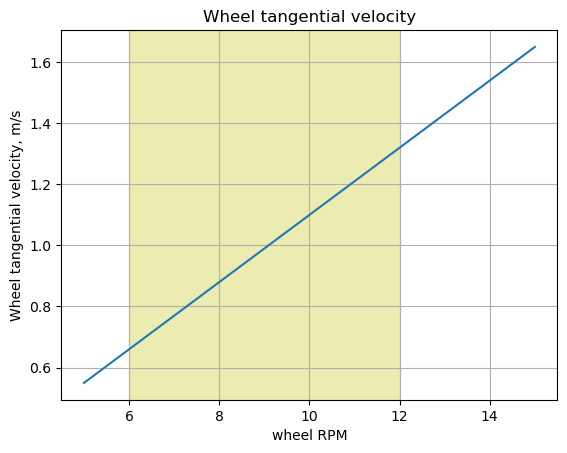

In [27]:
#| label: fig-tangential-vel
#| echo: true
#| fig-cap: "Wheel tangential velocity"

water_wheel_rotation_frequency = (np.arange(5,16))*ureg.rpm

plt.plot(water_wheel_rotation_frequency.magnitude,(sys_param['wheel diameter']/2*water_wheel_rotation_frequency.to('Hz')).to_base_units().magnitude,'-')

# hightlight the operating band, 8 to 14 RPM
plt.axvspan(6, 12, color='y', alpha=0.3)

plt.grid()

plt.ylabel('Wheel tangential velocity, m/s')
plt.xlabel('wheel RPM')

plt.title('Wheel tangential velocity')
plt.show()

Flume water velocity should match the tangential velocity at the flow rate.

## Generator
There were two types of generators used in the project. The initial type was a Perminate Magnet Generator (PMG). The second type was an induction generator. In part 1 of the video series, Kris indicated that PMG was a 2kW, 220 Volt generator. Later in part 2, the 220V PMG wass changed to a 96V PMG of the same type.

### 2kW 3 phase PMG, 220V/96V types
First generator is a 2kW PM generator, exact specifications are not clear. Different voltages were used. Kris was unhappy about the perforance of the 1st generator.

The PMG is a Rewindagic generator obtained from from [AliExpress](https://www.aliexpress.us/item/3256805810088713.html?spm=a2g0o.productlist.main.11.7c394d609UmWma&algo_pvid=e88e2b0d-cefa-4d8f-87a4-75345f23b065&algo_exp_id=e88e2b0d-cefa-4d8f-87a4-75345f23b065-5&pdp_npi=4%40dis%21USD%211158.00%21555.84%21%21%211158.00%21%21%402101fb1a17010055921136573e7995%2112000035230390894%21sea%21US%210%21AB&curPageLogUid=MM4l4xnyzX3a&_gl=1*wxu29a*_ga*ODQ2MjE3MjYxLjE3MDEwMDU1OTc.*_ga_VED1YSGNC7*MTcwMTAwNTU5Ni4xLjAuMTcwMTAwNTU5Ni42MC4wLjA.), which was as far as I can tell is a 2kW, low speed permanent magnet generator, available in various voltages such as 48V, 220V, 400V. See @tbl-pmg-specs

| Model: PMG-2000L |  |
|:--|:--|
| Rated power | 2000W |
| Max power | 2500W |
| Rated voltage | 220v |
| Rated rotated speed | 500 RPM |
| Start torque | 0.74 Nm |
| Rated torque | 16.4 Nm |
| Working temperature |  -40 to 80 C |  
: Rewindagic generator specifications {#tbl-pmg-specs}  

Kris should have test this generator on a test stand, then mocked up the generator with the gear box and pulleys. I don't know what he was expecting the water wheel rotational speed to be when he was doing the design, but 10 RPM at 120 lps seems about right to me. He needed a gear ratio of 10:500 or 1:50, but his inital design was a 1:20. Later he upped the gear ratio to 1:40.  

Kris complained complained about the PMG overheating and could only make 1500 Watts for less than a minute before getting smoking hot. He also had difficulty getting the inverter and PMG to regulate the rotational speed of the water wheel, which may have promted him to change from 220 to 96 Volts. In part 3, Kris open the PMG case and measured the diamter of the wire in the windings and found it to be 0.7mm. There was some correspondence with the generator supplier and Kris concluded that the generator was improperly characterized and probably more like a 500 Watt generator rather than a 2kW generator. 

Testing on a gernerator test stand, rather than on site infront of the customer, is always prefered. He would have determine if the Rewindagic generator would meet his needs. He designed the gear box and PMG mounting around an untested generator. 

#### Thermal calculations
The following are some calculations to estimate the heat flow out of the PMG. The available power that can be delivered from the water wheel to the shaft of the generator at 120 lps is calculated below.

In [28]:
H = 2.1*ureg.meter # head equal to the wheel diameter
Q = 120*ureg.liter/(1*ureg.sec)
available_power_to_generator = (rho*g*Q*H*eta_waterwheel*eta_gear_box).to('watt')
#print('available power to generator: {:,.1f~P}'.format(available_power_to_generator))
Markdown('The available power to generator is {:,.1f~P}'.format(available_power_to_generator))

The available power to generator is 2,112.4 W

Assuming that the generator will convert avaliable power to electrical energy, then losses internal to the generator will produce heat.

In [29]:
#print('generator losses as heat: {:.1f~P}'.format((available_power_to_generator*(1-eta_generator)).to('watt')))
Markdown('The generator losses as heat based on efficiency are {:.1f~P}'.format((available_power_to_generator*(1-eta_generator)).to('watt')))

The generator losses as heat based on efficiency are 211.2 W

There are three paths for the internal heat to exit the PMG body, by convection, radiation and conduction. The heat flow from from each of these paths is estimated based on using a maximum ambient temperature of 38C and a maximum allowed generator case temperature of 80C. 

#### Convected heat
The heat convected from the PMG can be estimated by modeling the generator body as a horizontal cylinder with hemispheric end pieces. A simplified relation for natural convection heat transfer coefficient for a horizontal cylinder, was used from @Cengel2002, Table 15-1. Also see example 15-10, page 816.

The formula for the heat transfer coefficient for a horizontal cylinder is:  

$h_{conv}=1.32 {\frac {\Delta T}{D}}^{0.25}$

where:   
$h_{conv}$ = heat transfer coefficient for a horizontal cylinder  
$\Delta T$ =  difference in surface temperature and surrounding air  
$D$ = diameter of cylinder   

The convected heat transfer is given by: 

$Q_{conv}=h_{conv}A \Delta T$

where:  
$Q_{conv}$ = convective heat transfer  
$h_{conv}$ = heat transfer coefficient  
$A$ = area of motor case   
$\Delta T$ = surface temperature with surrounding enviroment     

Modeling the surface area of the generator as a cylinder with hemishpere end pieces. The diameter has been increased by 25% to account for radiating fins on the case.

In [30]:
ureg = pint.UnitRegistry(autoconvert_offset_to_baseunit = True) # allows for the conversion of temperatures
max_allowed_gen_case_temp = 80*ureg.degC
max_ambient_temp = 38*ureg.degC
delta_T = max_allowed_gen_case_temp - max_ambient_temp

D = 0.190*ureg.meter # diameter of motor case
D = D+D*0.25 # adjust the diameter by 25% to account for radiating fins on the case
L = 0.138*ureg.meter #length of motor case
A = np.pi*D*L + np.pi*D**2 # heat transfer surface of the generator (area of the cylinder plus end pieces)

h_conv = 1.32*((delta_T.magnitude)/(D.magnitude))**(0.25)
Q_conv = h_conv*A.magnitude*delta_T.magnitude
#print('Q_conv: {:.2f}W'.format(Q_conv))

Markdown('The estimated convection heat flow is {:.1f} Watts.'.format(Q_conv))

The estimated convection heat flow is 56.6 Watts.

#### Radiated heat
The heat transfer from radiation can be estimated from: 

$Q_{rad}=\epsilon A_s \sigma (T_s^4 - T_{surr}^4)$  

where:
$Q_{rad}$ = radiated heat transfer between the surface at temperature $T_s$ completely surrounded by a much larger surface at temperature $T_{surr}$  
$\epsilon$ = emissivity of the surface  
$A_s$ = surface area  
$\sigma$ = Stefan Boltzmann constant  
$T_s$ = surface temperature  
$T_{surr}$ = surrounding temperature   


In [31]:
emissivity = 0.85
alpha = 5.67e-8 # Stefan-Blotzmann constant
Q_rad = emissivity*A.magnitude*alpha*(max_allowed_gen_case_temp.to('degK').magnitude**4-max_ambient_temp.to('degK').magnitude**4)
#print('Q_rad: {:.2f}W'.format(Q_rad))
Markdown('The estimated radiated heat transfer is {:.1f} Watts'.format(Q_rad))

The estimated radiated heat transfer is 83.5 Watts

#### Heat conduction through base
There is heat transfer from the case to the frame through the mounting bracket.  

$Q_{cond}=\frac {\Delta T}{R}$  

where:   
$Q_{cond}$ = cinducted heat transfer between mounting feet and frame  
$\Delta T$ = surface temperature with surrounding enviroment    
$R$ = thermal resistance of generator base to frame   

The thermal resistance through the PMG mouting feet to the water wheel frame is estimated to be 10 Ohms.

In [32]:
R_thermal = 10 # a guess
Q_cond = delta_T.magnitude/R_thermal
#print('Q_cond: {:.2f}W'.format(Q_cond))
Markdown('The estimated conducted heat transfer is {:.1f} Watts.'.format(Q_cond))

The estimated conducted heat transfer is 4.2 Watts.

In [33]:
total_heat_out = Q_conv+Q_rad+Q_cond
#print('total heat transfered from the generator body to the enviroment: {:.1f} Watts'.format(total_heat_out))
Markdown('The total heat transfered from the generator body is the sum of the heat flow from the three paths, so \
the total heat transfered from the generator body to the enviroment is {:.1f} Watts.'.format(total_heat_out))

The total heat transfered from the generator body is the sum of the heat flow from the three paths, so the total heat transfered from the generator body to the enviroment is 144.3 Watts.

In [34]:
generator_losses_as_heat = (rho*g*Q*H*eta_waterwheel*eta_gear_box*(1-eta_generator)).to('watt')
Markdown('The generator produces heat internally from the winding and core losses of {:.1f~P}'.format(generator_losses_as_heat))

The generator produces heat internally from the winding and core losses of 211.2 W

In [35]:
Markdown('The net generator heat flow is {:.1f} Watts.'.format(total_heat_out - generator_losses_as_heat.magnitude))

The net generator heat flow is -66.9 Watts.

Since the net heat flow is negative, the generator will heat up.

In [36]:
ureg = pint.UnitRegistry(autoconvert_offset_to_baseunit = False) # change back to more strict unit checking

#### Why did the PMG generator get hot?

- inverter could have been in constant voltage mode with shaft to load power missmatch, wheel was spining too fast
- The difference between available power and displayed power on the inverter was 1000 W, was that difference being dissipated as heat?
- needed more testing to verify Kris's complaints about the genertor, because he swapped out a 500 RPM device for a 750 RPM device w/o changing the gear box

PMG winding wire diameter of 0.7 mm is probably on the low side for the 5 amps per phase calculated from the LTSpice circuit simulation of the generator windings, bridge recifier and resistive load.

### Self-excited induction generator (SEIG)
The third generator tried was a 2.2kW, 8 pole, induction generator from [Tec Motors](https://tecmotors.co.uk/products/motors/three-phase/aluminium-motors/ms/2-2kw-8-pole-foot-mounted-motor-b3-ie1-2-283tecab3/). This device as a motor, will make the rated power at 720 RPM. In video part 4 at time 0:51, the details on the motor face plate can be seen. See @tbl-seig-specs 

| | |
|:---|:---|
| Motor part code | 2.283TECAB3 |
| Frame size | 132S-8 |
| Output | 2.2 kW |
| Rotational Speed | 720 RPM |
| Voltage | 230/400 |
| Full Load Current | 10.32 \| 5.96 A |
| Full Load Torque | 29.180555 Nm |  
: Tec Motor generator specifications {#tbl-seig-specs}  

While the use of an induction generator is an acceptable choice, there some differences in the operation of a Self Exicted Induction Generator (SEIG). For this hydro project the primary differences are the use of capacitors across each phase to supply reactive power back to the generator, this assume that the rotor has some residual magnetism. The SEIG is physically larger and required modifications to the mounting block and weather/splash cover. The SEIG has a higher RPM than the old PMG and the gear box ratio needs to be changed to something in the area of 1:80.  

An analysis of the SEIG will not be included in this version of my notebook. In a future version, the proposed topics are:  

- use of a SEIG, pros and cons
- capacitor value calculation
- heat transfer
- use of MPP and PV inverters
- gear ratio

## The flume
![The flume](video_Screenshot_6.png){#fig-video_Screenshot_6}   

@fig-video_Screenshot_6 was taken from part 4 of the series and shows a view of the flume after modifications were made to round the corner of the turn. You can see that the depth of the water in the flume is about 50 mm or so and that the flow rate is somewhat high since there is turbulance observed in the flow. Kris complained that wheel was turning too fast and that the generter and inverter were not slowing the wheel rotation rate. There was significant anount of splashing of the water as it entered the buckets and he built a nozzel help guide the water to the buckets. He did not address the velocity of the water compared to the tangential velocity of the wheel nor the flow rate requirements of the flume or the flume design. 

The [flume](https://www.merriam-webster.com/dictionary/flume) carries water from the dam to the top of the waterwheel. By examining the videos, I made some estimates for the flume dimensions. The width of the flume was about the same width of the waterwheel, which makes sense, since you want an even flow of water into the buckets. The side walls of the flume looked like 150 mm high, so this would be the maximum depth of water the could flow through the flume.

I can use the Manning equation for open channel flow to calculate the flow rate in the flume. [Mannings equation](https://en.wikipedia.org/wiki/Manning_formula) is an empirical equation that applies to uniform flow in open channels and is a function of the channel velocity, flow area and channel slope.

$V = \frac {s^{1/2} \times R^{2/3}} {n}$

where:

V - water velocity  
n - Manning's roughness coefficient; [unplaned wood](https://www.engineeringtoolbox.com/mannings-roughness-d_799.html) = 0.013, wood sides and smooth sheet metal bottom   
R - The channel's hydraulic radius, calculated by dividing the water flow's cross-sectional area A by its wetted perimeter P  
s - Slope of the channel's bottom surface  

Examining Manning's equation, we can see that the area and slope are directly proportional to the water flow rate, which means an increase in area and slope would increase the water flow rate. On the other hand, the roughness coefficient and the wetted perimeter are inversely proportional to the water flow rate, meaning that increasing their values would decrease the water flow rate.

### Flume slope
In @Kris2023Survey, Kris proided some information about the length and slope of the flume. In the survey he stated: 

> Because this has to be quite long (approximately 8 meters) there needs to be a downward slope in order to keep the water flowing. I have made this slope 1 degree and it equates to a 300mm level change. 

Doing the math to calculate the slope and level change: 

In [37]:
flume_length = 8*ureg.meter
flume_drop = 300*ureg.mm
flume_drop.ito('meter')

#print('angle of slope: {:.2f}'.format(np.arctan(flume_drop/flume_length).to('degree')))
Markdown('The angle of slope is {:.2f}s.'.format(np.arctan(flume_drop/flume_length).to('degree')))

The angle of slope is 2.15 degrees.

The math works out to about 2 degrees.

In [38]:
flume_slope = flume_drop.magnitude/flume_length.magnitude
#print('flume slope: {:.1f}%'.format(flume_slope*100))
Markdown('The flume slope is {:.1f}%.'.format(flume_slope*100))

The flume slope is 3.8%.

So which is it, 1 degree or 300mm drop? 

In the project survey, Kris goes through the verticle dimentions of the available head. 

> There is a drop of 2.6m from the top of the dam to the point that the outlet stream bed levels out.

>The total head is 2.6m. Because the wheel has to be sited further down hill than the dam, there needs to be a water trough feeding the wheel. Because this has to be quite long (approximately 8 meters) there needs to be a downward slope in order to keep the water flowing. I have made this slope 1 degree and it equates to a 300mm level change. This brings the head down to 2.3m there needs to be a gap between the feed trough and the top of the wheel and this gap is 100mm. This leaves 200mm of head left. The waterwheel can't touch the water at the bottom or it will cause drag so we need a gap there of at least 100mm now we are down to 2.1m and then I have allowed a 100mm tolerance so a 2m wheel is the correct size for this site. Though the wheel is now only 2m the other 0.5m of head is not completely lost. That 0.5m of head the water is still falling and gaining speed in the trough so the 0.5m head is not lost it is just susceptible to some friction losses in the trough.

subtractions:  

- 300 mm for the flume
- 100 mm gap between top of wheel and flume
- 100 mm gap at tbottem of wheel
- 100 mm tolerance

Here he states that the wheel of 2m is the correct size. However, eariler in the videos, he stated the wheel is 2.1 m in diameter. So a diameter of 2.1 m was used in the calculations above. Since Kris went through the gaps and tolerances to size the water wheel diameter, I'm going to assume that the slope is 0.3 meters divided by 8 meters or 3.8% and not 1 degree.

In [39]:
#| label: tbl-flume-calculations
#| echo: true
#| tbl-cap: Flume calculations using Manning equation

# Flume calculations using Manning equation
flume_width = 800*ureg.mm
water_depth = 70*ureg.mm # estimated depth of the water in the flume
# convert to base units
flume_width.ito('meter')
water_depth.ito('meter')
water_cross_section_area = water_depth*flume_width
wetted_perimeter = 2*water_depth+flume_width
hydraulic_radius = water_cross_section_area/wetted_perimeter
roughness_coefficient = 0.013 # Wood - unplaned
slope = flume_slope
# need to use magnitude of quantity when using fractional exponents
water_flume_velocity = (((hydraulic_radius.magnitude)**(2/3)*slope**(1/2))/roughness_coefficient)*ureg.meter/ureg.sec
volumetric_flow_rate = water_flume_velocity*water_cross_section_area

table_header = ['Calculation', 'Result']
table_row = []
table_row.append(['Water cross section area', '{:.2f~P}'.format(water_cross_section_area)])
table_row.append(['Wetted perimeter', '{:.2f~P}'.format(wetted_perimeter)])
table_row.append(['Hydraulic radius', '{:.2f~P}'.format(hydraulic_radius)])
table_row.append(['Slope', '{:.1f}%'.format(slope*100)])
table_row.append(['Water flume velocity', '{:.1f~P}'.format(water_flume_velocity)])
table_row.append(['Volumetric flow rate', '{:.2f~P}'.format(volumetric_flow_rate)])
table_row.append(['Volumetric flow rate', '{:.2f~P}'.format(volumetric_flow_rate.to('liter/sec'))])

Markdown(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Calculation               Result
------------------------  ----------
Water cross section area  0.06 m²
Wetted perimeter          0.94 m
Hydraulic radius          0.06 m
Slope                     3.8%
Water flume velocity      2.3 m/s
Volumetric flow rate      0.13 m³/s
Volumetric flow rate      127.24 l/s

The values calculated by Manning's equation are estimates, so we should get too hung up on the magnitudes, but the these numbers can serve as a guide to what's happing in the flume. Given the roughness coefficient and slope, the water velocity is above 2 m/s and in the videos, the water at high flow rates is moving fast. The velocity of the water definately exceeds the tangential velocity of the water wheel and it is appearent in the videos that lots of water is slpashing out of the buckets when Kris tries to run the hydro system at full power. Some adjustments to the flume are needed.

### Flume re-design
To avoid a total rebuild of the flume, some modifications could be made to decrease the flow velocity while maintaing the desired flow rate. The slope of the flume is kept, since the slope would be hard to change. The inlet depth would need to be increased to allow a deeper flow and baffles or corrugated surface could be installed to line the bottem channel of the flume. This would cause some energy dissipation and slow the flow characteristics. In the calculations below the water depth and roughness coefficient were adjusted. Modifications to the flume surface roughness would need to proceed by trial and error until the right combination of water depth and surface roughness yeilds the desired flow velocity and volume.

The inlet to the flume is adjust to bring the depth in the flume channel up to 150mm. The inlet level to the spillway might need to be raised and along with the flume side walls to rase the level of water entering the flume. The surface roughness coefficient needs to be increased by adding baffles. The calculations below produce a flow velocity of 1 m/s and a volume of 132 l/s. 

In [40]:
#| label: tbl-flume-redesign
#| echo: true
#| tbl-cap: Flume redesign
flume_width = 800*ureg.mm
water_depth = 150*ureg.mm
# convert to base units
flume_width.ito('meter')
water_depth.ito('meter')
water_cross_section_area = water_depth*flume_width
wetted_perimeter = 2*water_depth+flume_width
hydraulic_radius = water_cross_section_area/wetted_perimeter
roughness_coefficient = 0.04 # increased by adding baffles
slope = flume_slope
# need to use magnitude of quantity when using fractional exponents
water_flume_velocity = (((hydraulic_radius.magnitude)**(2/3)*slope**(1/2))/roughness_coefficient)*ureg.meter/ureg.sec
volumetric_flow_rate = water_flume_velocity*water_cross_section_area

table_header = ['Calculation', 'Result']
table_row = []
table_row.append(['Water cross section area', '{:.2f~P}'.format(water_cross_section_area)])
table_row.append(['Wetted perimeter', '{:.2f~P}'.format(wetted_perimeter)])
table_row.append(['Hydraulic radius', '{:.2f~P}'.format(hydraulic_radius)])
table_row.append(['Slope', '{:.1f}%'.format(slope*100)])
table_row.append(['Water flume velocity', '{:.1f~P}'.format(water_flume_velocity)])
table_row.append(['Volumetric flow rate', '{:.2f~P}'.format(volumetric_flow_rate)])
table_row.append(['Volumetric flow rate', '{:.2f~P}'.format(volumetric_flow_rate.to('liter/sec'))])

Markdown(tabulate(table_row, headers=table_header,colalign = ('left','left'),tablefmt="simple"))

Calculation               Result
------------------------  ----------
Water cross section area  0.12 m²
Wetted perimeter          1.10 m
Hydraulic radius          0.11 m
Slope                     3.8%
Water flume velocity      1.1 m/s
Volumetric flow rate      0.13 m³/s
Volumetric flow rate      132.64 l/s

# Safety
Kris didn't discuss any safety criteria that was part of the design effort. He did talk about how his responsibility was primarily for the wheel itself and that the owner had arrange for the work for the construction of the flume, mill pond and spillway. Kris also mentioned that a qualified electrition would be responcible for some of the wiring and implied also that the grid tie connection part would be taken care of. 

The uncontrolled discharge of surplus water past the dam should be automatic and not dependent upon human control. The spillway intake should be large enough to discharge a volume of water during floods without increasing the water level in the mill pod and causing problems upstream. In the project survey he states: 

> Because of this we need to install and bypass drain from the mill pond around the bridge. This would outlet back in the the stream. This overflow will be set a a hight that it will start to drain and bypass water once the wheel has its full volume. There will also be a basic gate to control this flow rate manually. The nature of the land that this bypass is sited within is very difficult to model in 3d. It needs to have a slope to it and has to have at least one change in direction. For this I would recommend at least 500mm wide by 400mm high square channel. 

He provied no rational to support his assursion that a 500mm by 400mm square channel would be sufficient. 

Given that the primary fococus of the four videos was about the construction of the water wheel and not about its design, it's understandable that safety was not discussed too much. 

# Maintenance
Kris didn't discuss the topic of maintenance of any of the components of the hydro project. This would include the water wheel, water wheel bearings, gear box, generator and associated electronics. There is probably some small level of maintenace and inspections required for the leat, mill pond, flume and spillway. Kris didn't discuss his selection critiera or specifications for those items that would experience a high moisture operating enviroment. One thing that comes to mind is that the generator didn't seem like it was indented to be used outdoors, even if it was under a cover.   

# Economic analysis
This project was done in the UK, so I looked up electrical rates for the region in the UK I think this project was located. The power usage on the property was never discussed, for the economic analysis I'm going to assume that 700 Watts is the average load. The hydro system is planned to generate 1500 Watt 24 hours per day. The time frame for the economic analysis is 15 years. 15 years was chosen because this amount of time seemed reasonalble to evaluate the yearly cash flow for the project. The initial cost for construction and materials would be included in the first year's cash flow. Cash flows for subsequent years would include maintenace averaged per year along with the cash received for any net power production for the year. 

In the 5th video, at time 13:07, Kris showed the data from the inverter. Total yield reported on that day was 479kWh for earnings of 134.12 GBP. I'm going to use 28p/kWh for electricity rate and the same for the net meter rate.

| | |
|---|---|
| electricity rate | £0.28 |
| net meter rate | £0.28 |
| average load | 500 W |
| average power generated | 1000 W |
| time frame for the economic analysis | 15 years |
: Parameters for economic analysis {#tbl-econ-anal}  

See table @tbl-econ-anal

In [41]:
#| echo: true
house_pwr_usage = 700*ureg.watt
meter_rate = (134.12/479)/(1000*ureg.Wh)
house_yearly_energy_usage_cost = 365*24*ureg.hr*house_pwr_usage*meter_rate

Markdown('The hydro system is planned to generate electrical power 24 hours per day and this project was done in the UK. In the 5th video, \
at time 13:07, Kris showed the data from the inverter,some of which I\'ll use in my analysis. I\'m going to use \u00a3{:.3f}/kWh for electricity \
rate and the same for the net meter rate. The power usage on the property was never discussed, for the economic analysis I\'m going \
to assume that {:.0f} Watts is the average load. The house daily energy usage is {:,.0f} and the daily energy usage cost \
is \u00a3{:.2f}. The annual energy cost is \u00a3{:,.2f}.'.format(
(meter_rate*1000).magnitude,
house_pwr_usage.magnitude,
(24*ureg.hr*house_pwr_usage).magnitude,
(24*ureg.hr*house_pwr_usage*meter_rate).to_base_units().magnitude,
house_yearly_energy_usage_cost.to_base_units().magnitude))

The hydro system is planned to generate electrical power 24 hours per day and this project was done in the UK. In the 5th video, at time 13:07, Kris showed the data from the inverter,some of which I'll use in my analysis. I'm going to use £0.280/kWh for electricity rate and the same for the net meter rate. The power usage on the property was never discussed, for the economic analysis I'm going to assume that 700 Watts is the average load. The house daily energy usage is 16,800 and the daily energy usage cost is £4.70. The annual energy cost is £1,716.96.

The time frame for the economic analysis is 15 years. 15 years was chosen because this amount of time seemed reasonalble to evaluate the yearly cash flow for the project. The initial cost for construction and materials would be included in the first year's cash flow. Cash flows for subsequent years would include maintenace averaged per year along with the cash received for any net power production for the year.

Since the water wheel is generating more power than needed, the cost saved per year is equal to the cost of electrical energy consumed.

In [42]:
saved_cost_yr = house_yearly_energy_usage_cost
#print('cost saved per year: \u00a3{:,.2f}'.format(saved_cost_yr.to_base_units().magnitude))
Markdown('The net energy used per day is the generated energy per day minus the daily energy usage, \
so the cost saved per year is \u00a3{:,.2f}.'.format(saved_cost_yr.to_base_units().magnitude))

The net energy used per day is the generated energy per day minus the daily energy usage, so the cost saved per year is £1,716.96.

In [43]:
generated_pwr = 1000*ureg.watts
net_pwr_usage = generated_pwr - house_pwr_usage
net_energy_day = 24*ureg.hour*net_pwr_usage
#print('net energy per day: {:,.0f~P}'.format(net_energy_day))
Markdown('I\'m going to set the daily average to 1kW, since this is what Kris seemed to imply in part 5 of the series. \
The net energy used per day is {:,.0f~P}.'.format(net_energy_day))

I'm going to set the daily average to 1kW, since this is what Kris seemed to imply in part 5 of the series. The net energy used per day is 7,200 W·h.

In [44]:
net_meter_rate = meter_rate #0.30/(1000*ureg.Wh) #avg_net_meter_rate/((1000*ureg.Wh)) # amount per kWh
net_meter_credit_yr = (365*net_energy_day*net_meter_rate).to_base_units()

Markdown('In this analysis I\'m going to use \u00a3{:.2f} per kWh for the net meter rate. \
The net meter credit would be \u00a3{:,.2f} per day and \u00a3{:,.2f} per year.'.format(net_meter_rate.magnitude*1000,
(net_energy_day*net_meter_rate).to_base_units().magnitude, net_meter_credit_yr.magnitude))

In this analysis I'm going to use £0.28 per kWh for the net meter rate. The net meter credit would be £2.02 per day and £735.84 per year.

The number of years for this economic analysis is 15 years. This is the time frame that the [internal rate of return](https://en.wikipedia.org/wiki/Internal_rate_of_return) will be calculated for. The internal rate of return is a method of quantifying the merits of a project or investment opportunity. The calculation is termed internal because it depends only on the cash flows of the investment being analyzed and excludes external factors, such as returns available elsewhere, the risk-free rate, inflation, the cost of capital, or financial risk.

In [45]:
def irr(values, guess=None, tol=1e-12, maxiter=100):
    """
    Return the Internal Rate of Return (IRR).
    This is the "average" periodically compounded rate of return
    that gives a net present value of 0.0; for a more complete explanation,
    see Notes below.
    :class:`decimal.Decimal` type is not supported.
    Parameters
    ----------
    values : array_like, shape(N,)
        Input cash flows per time period.  By convention, net "deposits"
        are negative and net "withdrawals" are positive.  Thus, for
        example, at least the first element of `values`, which represents
        the initial investment, will typically be negative.
    guess : float, optional
        Initial guess of the IRR for the iterative solver. If no guess is
        given an heuristic is used to estimate the guess through the ratio of
        positive to negative cash lows
    tol : float, optional
        Required tolerance to accept solution. Default is 1e-12.
    maxiter : int, optional
        Maximum iterations to perform in finding a solution. Default is 100.
    Returns
    -------
    out : float
        Internal Rate of Return for periodic input values.
    """
    values = np.atleast_1d(values)
    if values.ndim != 1:
        raise ValueError("Cashflows must be a rank-1 array")

    # If all values are of the same sign no solution exists
    # we don't perform any further calculations and exit early
    same_sign = np.all(values > 0) if values[0] > 0 else np.all(values < 0)
    if same_sign:
        return np.nan

    # If no value is passed for `guess`, then make a heuristic estimate
    if guess is None:
        positive_cashflow = values > 0
        inflow = values.sum(where=positive_cashflow)
        outflow = -values.sum(where=~positive_cashflow)
        guess = inflow / outflow - 1

    npv_ = np.polynomial.Polynomial(values[::-1])
    d_npv = npv_.deriv()
    g = 1 + guess

    for _ in range(maxiter):
        delta = npv_(g) / d_npv(g)
        if abs(delta) < tol:
            return g - 1
        g -= delta

    return np.nan

construction_cost = 20000 # who knows?
maintenance_cost = 200 # per year
years_to_analyze = 15 # years

cash_flow_each_year = np.ones(years_to_analyze)*(saved_cost_yr+net_meter_credit_yr-maintenance_cost).magnitude

# include construction cost in 1st year
cash_flow_each_year[0] = cash_flow_each_year[0]-construction_cost
#cash_flow_each_year

The construction cost of the hydro system was never discussed and some of the work was done by friends and family. Just taking a wild guesss and using £20000 for the materials and construction cost and a average yearily maintence cost of £200 (also a guess), the internal rate of return can be calculated over the estimated cash flows for 15 years.

In [46]:
#print('internal rate of return: {:.1f}%'.format(irr(cash_flow_each_year)*100))
Markdown('Using the parameters stated above, the IRR works out to be {:.1f}%, which indicates that the ROI is favorable. \
The IRR is highly senditive to the electrical power rates, for both received and generated power and the net energy useage.'.format(irr(cash_flow_each_year)*100))

Using the parameters stated above, the IRR works out to be 8.8%, which indicates that the ROI is favorable. The IRR is highly senditive to the electrical power rates, for both received and generated power and the net energy useage.

# Summary

critical aspects to get right

- feasability, including econmics   
- project management steps:
  1) requirement review
  2) preliminary design review
  3) testing of proto type
  4) critical design review
  5) intallation and final testing  
- design and selection of generator, gear box and inverter combination  
- flume  leat, dam and spillway design  
- wheel design  
- provisions for adjusting the gearbox ratio post install
- enviromental requirements (high moisture enviroment, operating temperature ranges, possibility of freezing temperatures and ice in and on the mill pond, flume and water wheel)

Issues

- generator not thourally tested in the shop, just an open circuit test  
- flume design too steep, water velocity too high and flow rate insufficient  
- gear ratio too low for induction generator  
- instrumentation not discussed adequatily  
- safety not addressed, except for emergency shut off and grid down load dump  
- economics of grid tie don't work unless net meter rate is at full rate or normal power consuption is about equal to the generator capacity  
- maintenance not addressed  
- SEIG needs  
  - recovery from loss of latent magnization  
  - soft start  

# References {.unnumbered}

::: {#refs}
:::